In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
import json

In [2]:
os.chdir('../Datasets/')
with open("encode_info1.json") as fh:
    data = json.load(fh)
    
genres = data[0]
keywords = data[1]
languages = data[2]
production_countries = data[3]
production_companies = data[4]
character = data[5]
gender = data[6]
actorname = data[7]
director_name = data[8]
status = data[9]

In [3]:
os.chdir('../Datasets/')
df = pd.read_csv("tmdb_encoded_genres_keywords_languages_productioncountries_productioncompanies_character_gender_actorname_directorname_status.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [5]:
df.head(2)

budget     id                            original_title  \
0  237000000  19995                                    Avatar   
1  300000000    285  Pirates of the Caribbean: At World's End   

                                            overview  popularity release_date  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   2009-12-10   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   2007-05-19   

      revenue  runtime                                         tagline  \
0  2787965087    162.0                     Enter the World of Pandora.   
1   961000000    169.0  At the end of the world, the adventure begins.   

                                      title  ...  production_countries  \
0                                    Avatar  ...                [0, 1]   
1  Pirates of the Caribbean: At World's End  ...                   [0]   

   spoken_languages original_language  \
0            [0, 1]                 0   
1               [0]                 0   

                                              actors  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1  [83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 9...   

                                          characters male_count female_count  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         51           12   
1  [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 6...          4            5   

   undefined_gender_count director status  
0                      20        0      1  
1                      25        1      1  

[2 rows x 25 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  4803 non-null   int64  
 1   id                      4803 non-null   int64  
 2   original_title          4803 non-null   object 
 3   overview                4800 non-null   object 
 4   popularity              4803 non-null   float64
 5   release_date            4802 non-null   object 
 6   revenue                 4803 non-null   int64  
 7   runtime                 4803 non-null   float64
 8   tagline                 3959 non-null   object 
 9   title                   4803 non-null   object 
 10  vote_average            4803 non-null   float64
 11  vote_count              4803 non-null   int64  
 12  genres                  4803 non-null   object 
 13  keywords                4803 non-null   object 
 14  production_companies    4803 non-null   

In [7]:
print("Shape: ", end=' ')
df.shape                          # Shape of the dataset

Shape:  

(4803, 25)

In [8]:
print("Summary of the Dataframe:")
df.describe()                     # summary of the Dataframe

Summary of the Dataframe:


budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4803.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.830939   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.714124   
min    0.000000e+00       5.000000     0.000000  0.000000e+00    -1.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   117.500000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  original_language   male_count  \
count   4803.000000   4803.000000        4803.000000  4803.000000   
mean       6.092172    690.217989           0.705184     7.036852   
std        1.194612   1234.585891           4.545905    11.176134   
min        0.000000      0.000000           0.000000     0.000000   
25%        5.600000     54.000000           0.000000     1.000000   
50%        6.200000    235.000000           0.000000     4.000000   
75%        6.800000    737.000000           0.000000     8.000000   
max       10.000000  13752.000000          87.000000   164.000000   

       female_count  undefined_gender_count     director       status  
count   4803.000000             4803.000000  4803.000000  4803.000000  
mean       5.031855               10.054341   819.504268     1.000416  
std        5.368746                7.942877   671.474779     0.040814  
min        0.000000                0.000000    -1.000000     0.000000  
25%        2.000000                5.000000   243.000000     1.000000  
50%        4.000000                8.000000   621.000000     1.000000  
75%        6.000000               13.000000  1316.500000     1.000000  
max      107.000000               88.000000  2348.000000     2.000000

<Figure size 432x288 with 0 Axes>

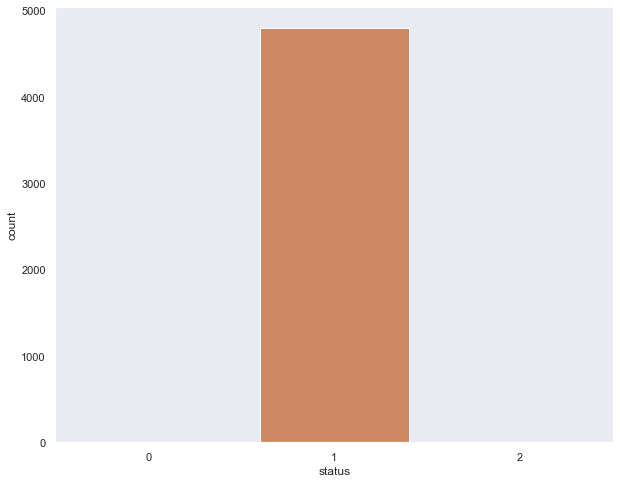

In [9]:
sb.set(font_scale=1)       #matplotlib.rc_file_defaults()
plt.tight_layout()
plt.figure(figsize=(10,8))
plt.grid()
sb.countplot(x='status', data=df, )
plt.savefig('../plots/Plots DF1/status_count_barplot.png')
plt.show()

In [10]:
print(df['status'].value_counts())

1    4795
2       5
0       3
Name: status, dtype: int64


In [15]:
print("Count different Values in column:")
for (col,colval1) in df.iloc[:, :].iteritems(): 
    try:
        print("___________"+str(col)+"_______________")
        print(df[col].value_counts())
        print("\n\n\n")
    except:
        pass

Count different Values in column:
___________budget_______________
0           1037
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13200000       1
14350531       1
3100000        1
12800000       1
9000           1
Name: budget, Length: 436, dtype: int64




___________id_______________
19995     1
333355    1
71157     1
43418     1
11588     1
         ..
13156     1
293863    1
16871     1
307081    1
25975     1
Name: id, Length: 4803, dtype: int64




___________original_title_______________
Out of the Blue       2
Batman                2
Undiscovered          1
Beneath Hill 60       1
The I Inside          1
                     ..
Secondhand Lions      1
The Age of Adaline    1
Drag Me to Hell       1
Southpaw              1
My Date with Drew     1
Name: original_title, Length: 4801, dtype: int64




___________overview_______________
In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes

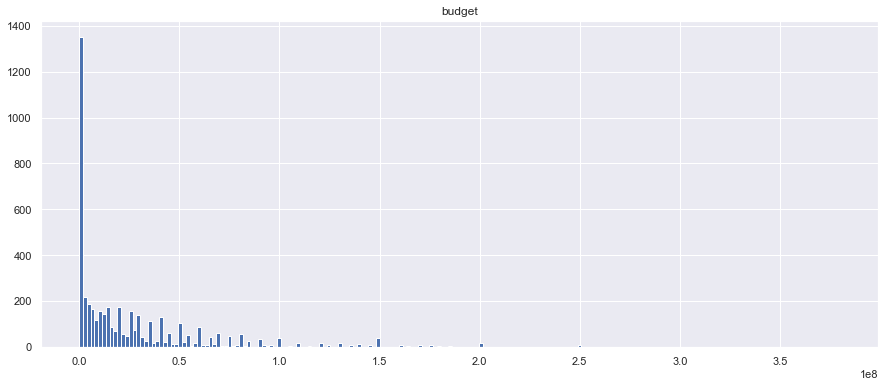

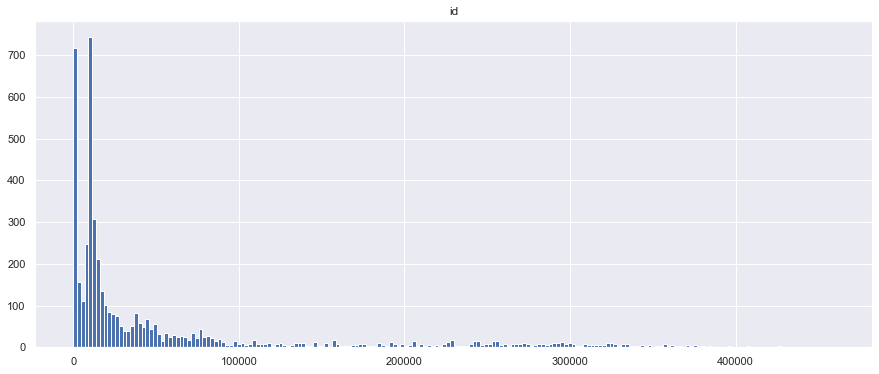

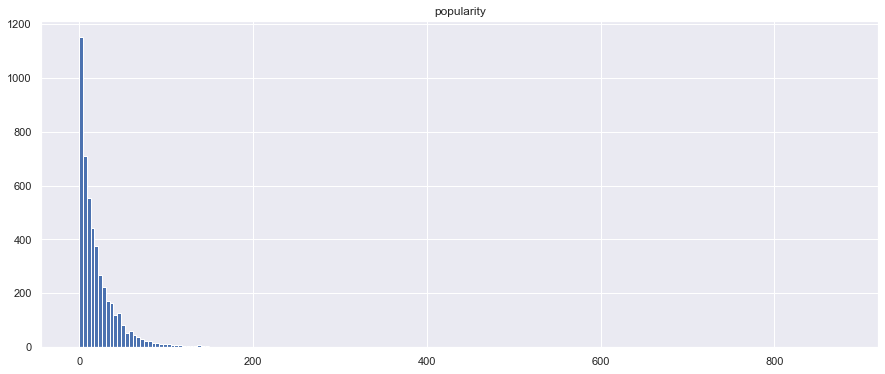

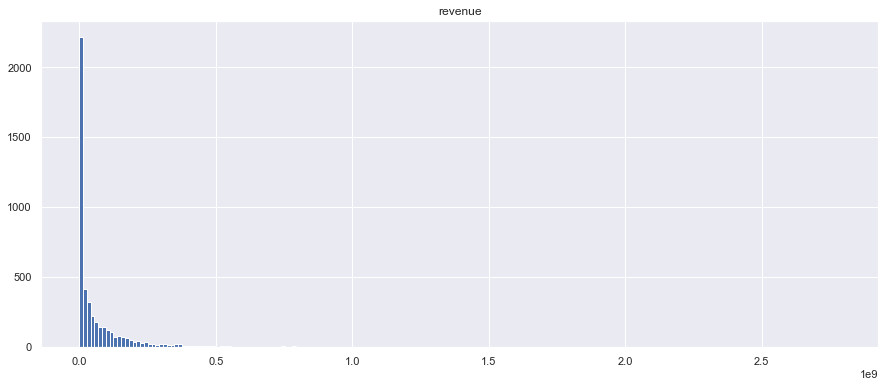

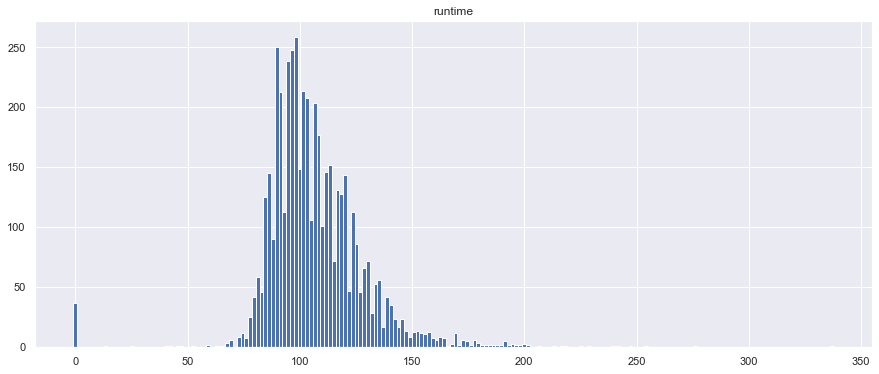

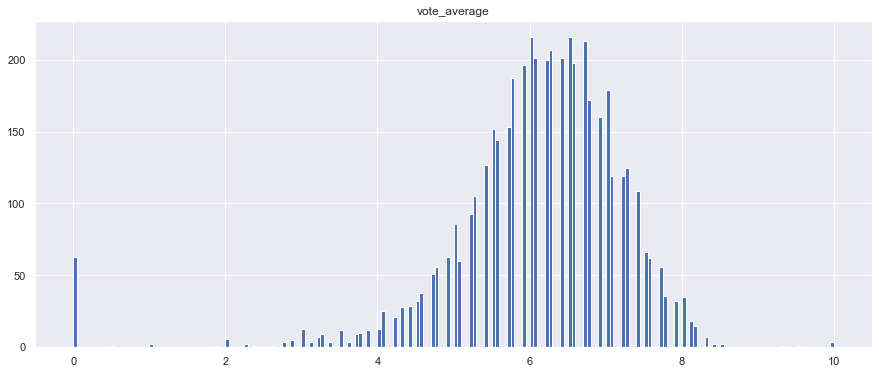

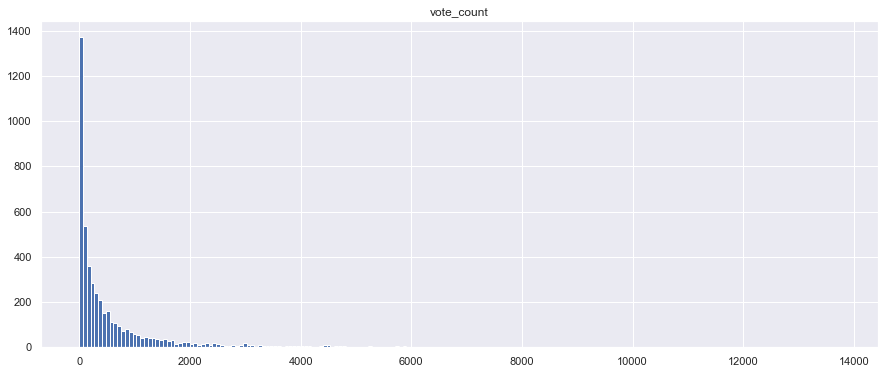

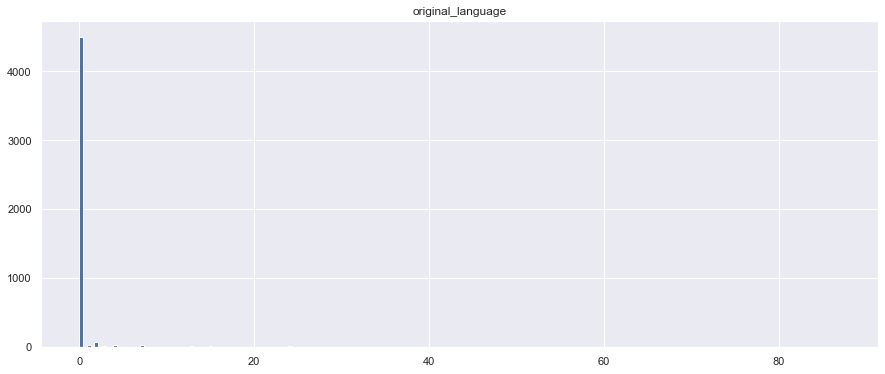

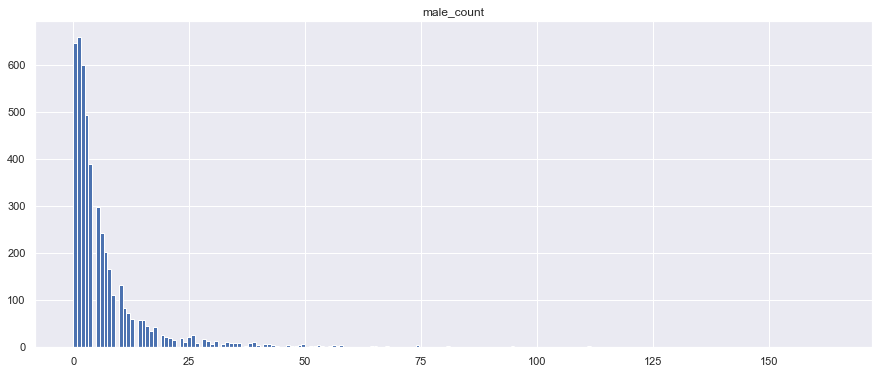

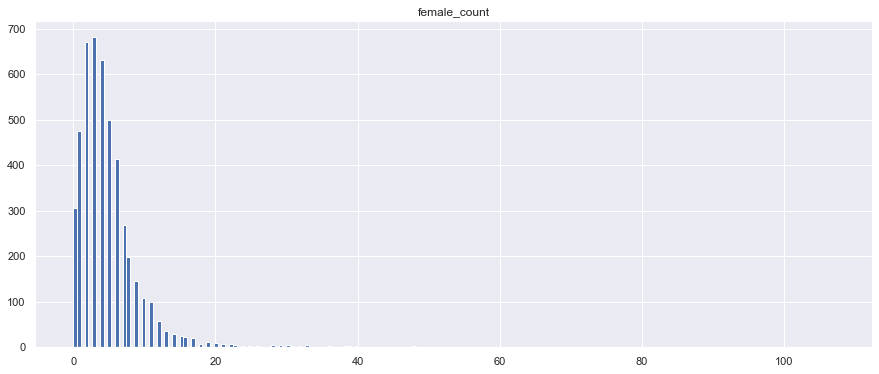

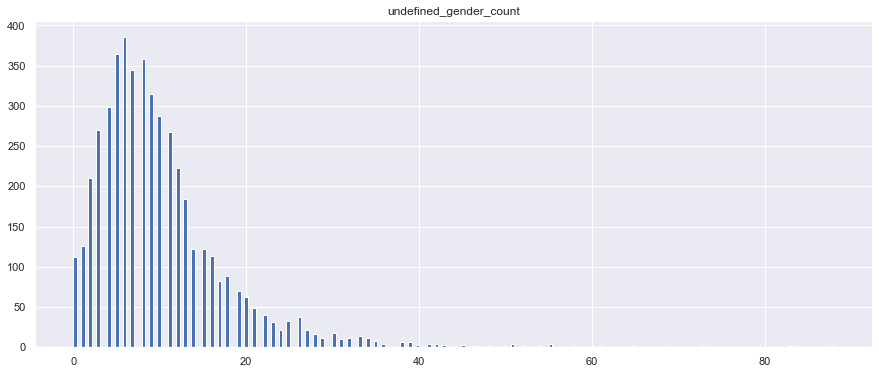

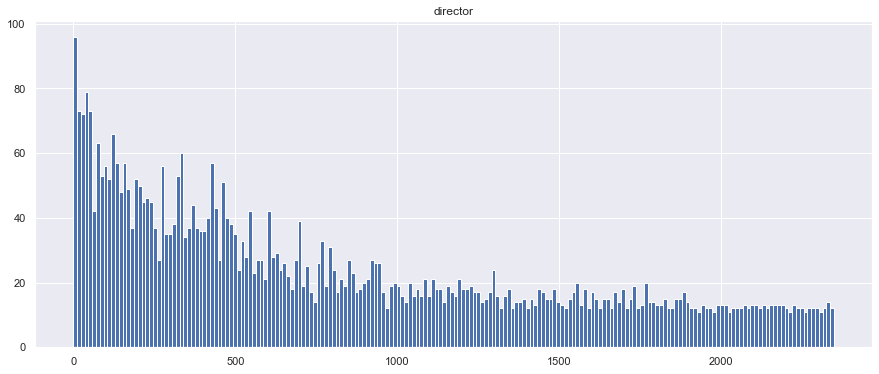

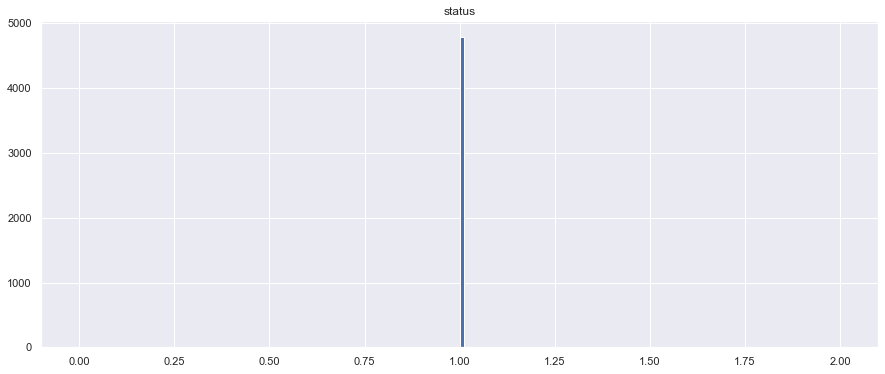

In [10]:
sb.set(rc={'figure.figsize':(15,6)})
for i in range(0,df.shape[1]):
    try:
        df.hist(column=df.columns[i], bins=200, edgecolor='white', label = df.columns[i])
        st = "../plots/Plots DF1/hist_col_"+str(i)+".png"
        plt.savefig(st)
        plt.show()
    except:
        pass

# Correlations and Heatmap

In [11]:
print("All correaltion in df")
df.corr()          # calculate all correaltion in df

All correaltion in df


budget        id  popularity   revenue   runtime  \
budget                  1.000000 -0.089377    0.505414  0.730823  0.269610   
id                     -0.089377  1.000000    0.031202 -0.050425 -0.160271   
popularity              0.505414  0.031202    1.000000  0.644724  0.225732   
revenue                 0.730823 -0.050425    0.644724  1.000000  0.250897   
runtime                 0.269610 -0.160271    0.225732  0.250897  1.000000   
vote_average            0.093146 -0.270595    0.273952  0.197150  0.376272   
vote_count              0.593180 -0.004128    0.778130  0.781487  0.271743   
original_language      -0.081138  0.066665   -0.051983 -0.059989  0.057673   
male_count              0.184433  0.102385    0.257340  0.260018  0.211457   
female_count            0.205906 -0.039958    0.203930  0.222650  0.142045   
undefined_gender_count  0.437988 -0.146200    0.386432  0.422779  0.374139   
director               -0.559403  0.248345   -0.373980 -0.419648 -0.280559   
status                 -0.007760 -0.030001   -0.007365 -0.005181 -0.027104   

                        vote_average  vote_count  original_language  \
budget                      0.093146    0.593180          -0.081138   
id                         -0.270595   -0.004128           0.066665   
popularity                  0.273952    0.778130          -0.051983   
revenue                     0.197150    0.781487          -0.059989   
runtime                     0.376272    0.271743           0.057673   
vote_average                1.000000    0.312997           0.047482   
vote_count                  0.312997    1.000000          -0.053451   
original_language           0.047482   -0.053451           1.000000   
male_count                  0.183032    0.333512           0.007887   
female_count                0.095078    0.224106          -0.091939   
undefined_gender_count      0.246410    0.472025          -0.110607   
director                   -0.205462   -0.396740           0.122477   
status                     -0.008048   -0.005837          -0.027398   

                        male_count  female_count  undefined_gender_count  \
budget                    0.184433      0.205906                0.437988   
id                        0.102385     -0.039958               -0.146200   
popularity                0.257340      0.203930                0.386432   
revenue                   0.260018      0.222650                0.422779   
runtime                   0.211457      0.142045                0.374139   
vote_average              0.183032      0.095078                0.246410   
vote_count                0.333512      0.224106                0.472025   
original_language         0.007887     -0.091939               -0.110607   
male_count                1.000000      0.417367                0.450253   
female_count              0.417367      1.000000                0.429508   
undefined_gender_count    0.450253      0.429508                1.000000   
director                 -0.132983     -0.215416               -0.406553   
status                   -0.006882     -0.015267               -0.016129   

                        director    status  
budget                 -0.559403 -0.007760  
id                      0.248345 -0.030001  
popularity             -0.373980 -0.007365  
revenue                -0.419648 -0.005181  
runtime                -0.280559 -0.027104  
vote_average           -0.205462 -0.008048  
vote_count             -0.396740 -0.005837  
original_language       0.122477 -0.027398  
male_count             -0.132983 -0.006882  
female_count           -0.215416 -0.015267  
undefined_gender_count -0.406553 -0.016129  
director                1.000000 -0.001383  
status                 -0.001383  1.000000

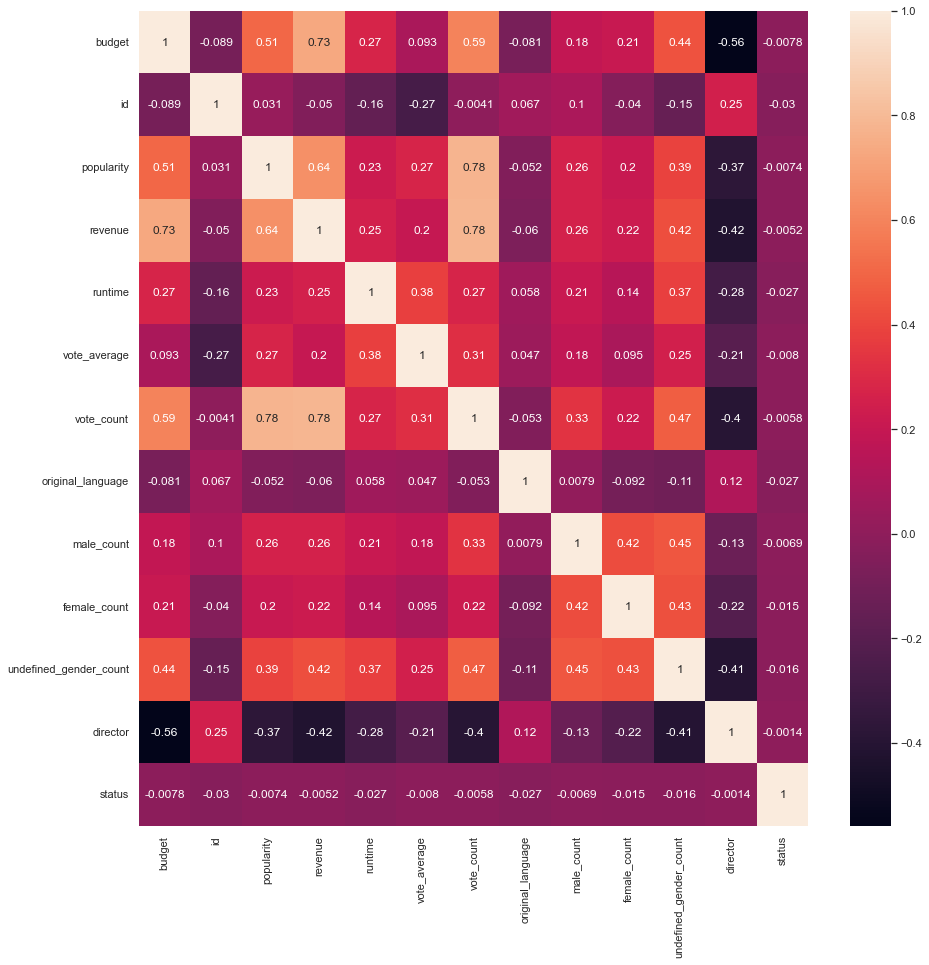

In [12]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(),annot=True)   # heatmap to show the correaltion between columns 
st = "../plots/Plots DF1/heatmap.png"
plt.savefig(st)
plt.show()

Correlation between 'Revenue' and 'Popularity' is 0.73

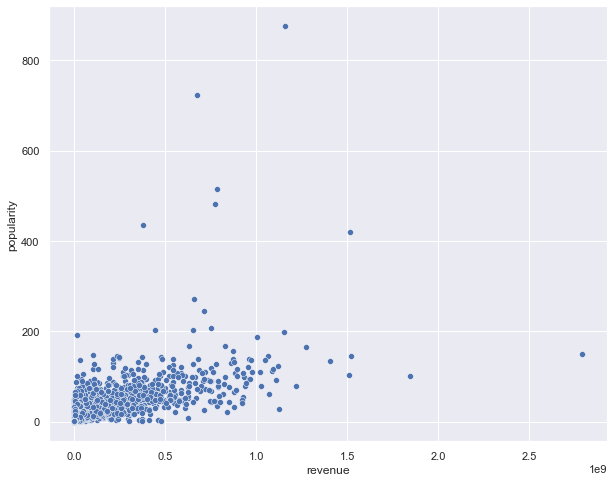

In [13]:
plt.figure(figsize=(10,8))
sb.scatterplot(x = df['revenue'] , y = df['popularity'], data = df)
plt.show()

# Plotting Scatter Plot for all highly Correlated Columns

Correlation between popularity and budget is 0.5054139990665325


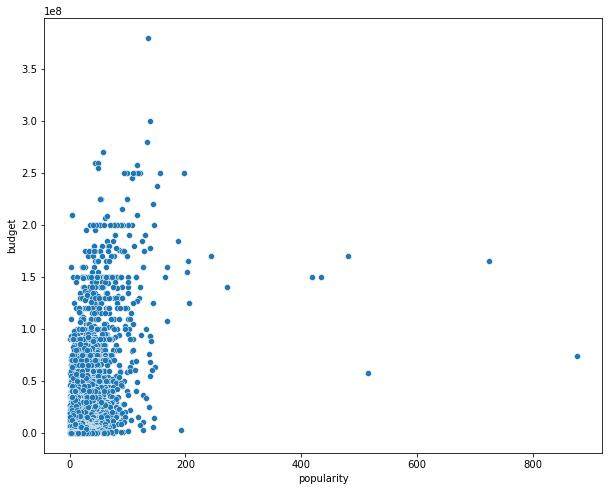

Correlation between revenue and budget is 0.7308228569244616


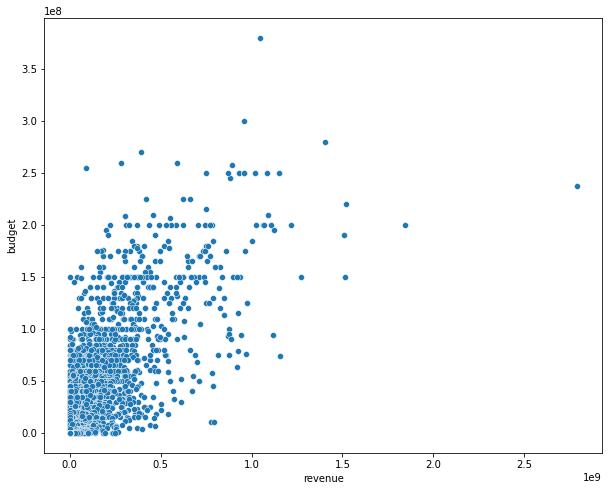

Correlation between revenue and popularity is 0.6447235045559979


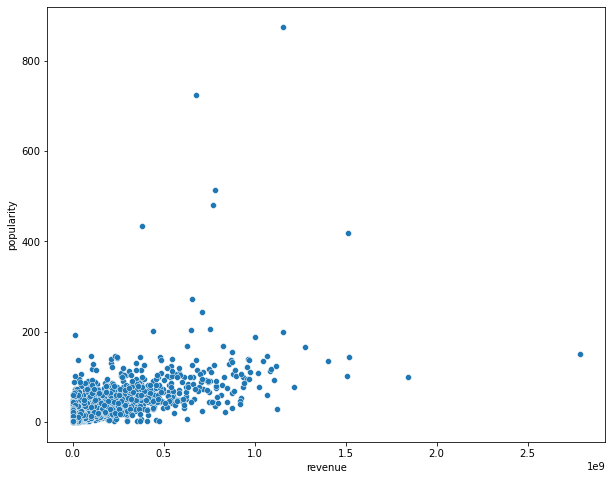

Correlation between vote_count and budget is 0.5931803381308576


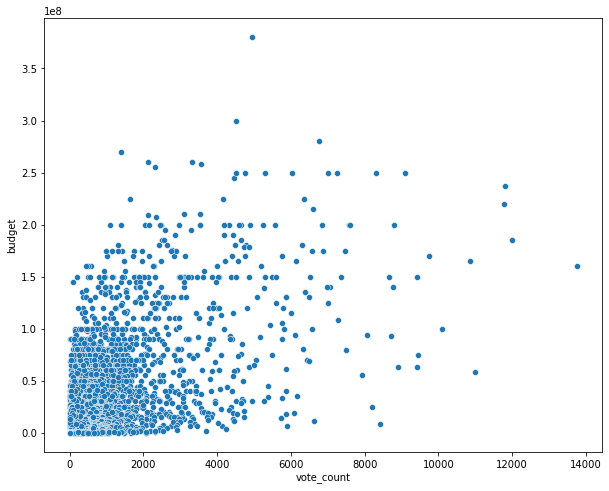

Correlation between vote_count and popularity is 0.7781298890348538


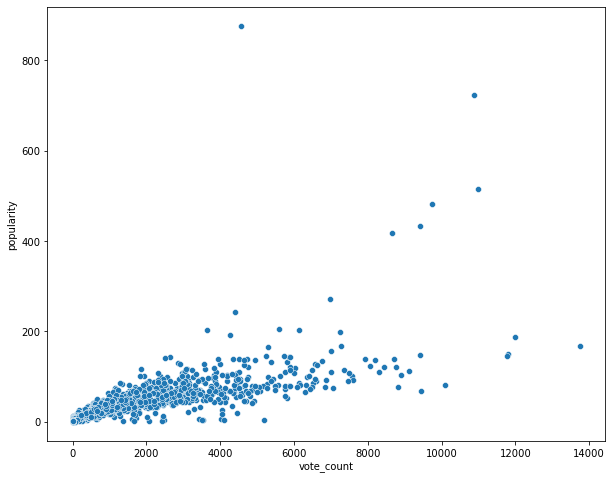

Correlation between vote_count and revenue is 0.781487326210197


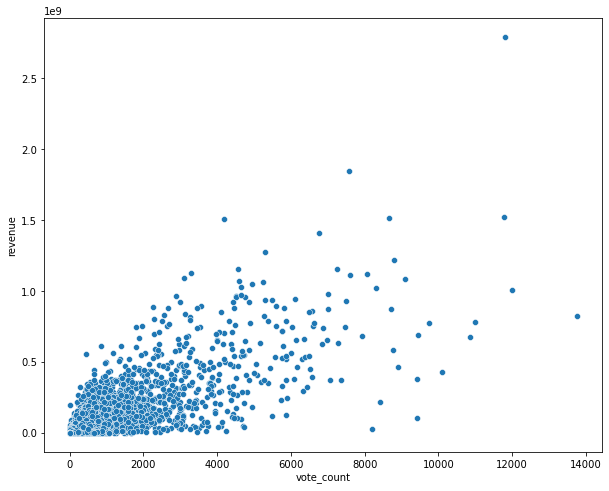

Correlation between director and budget is -0.5594031648064798


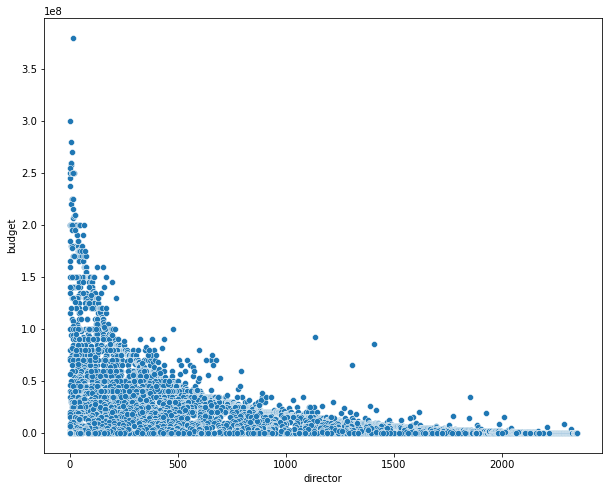

In [4]:
corr_list = []
for (col1,colval1) in df.iloc[:, :].iteritems():  
    for (col2,colval2) in df.iloc[:, :].iteritems():
        if col1 == col2: 
            break 
        t1 = []
        try:
            t = df[col1]. corr(df[col2]) 
            if(t > 0.5 or t < -0.5):
                t1.append(col1)
                t1.append(col2)
                t1.append(t)
                corr_list.append(t1)
        except:
            pass
        
for i in range(0, len(corr_list)):
    plt.figure(figsize=(10,8))
    print('Correlation between '+corr_list[i][0]+' and '+corr_list[i][1]+' is '+str(corr_list[i][2]))
    sb.scatterplot(x = df[corr_list[i][0]] , y = df[corr_list[i][1]], data = df)
    st = "../plots/Plots DF1/scatterplot_"+str(corr_list[i][0])+"_"+str(corr_list[i][1])+".png"
    plt.savefig(st)
    plt.show()

In [5]:
for i in range(0, len(corr_list)):
    print('Correlation between '+corr_list[i][0]+' and '+corr_list[i][1]+' is '+str(corr_list[i][2]))

Correlation between popularity and budget is 0.5054139990665325
Correlation between revenue and budget is 0.7308228569244616
Correlation between revenue and popularity is 0.6447235045559979
Correlation between vote_count and budget is 0.5931803381308576
Correlation between vote_count and popularity is 0.7781298890348538
Correlation between vote_count and revenue is 0.781487326210197
Correlation between director and budget is -0.5594031648064798


# Box Plot

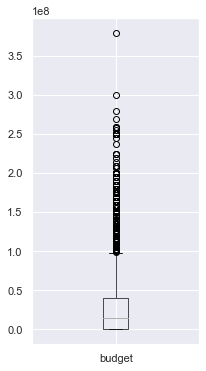

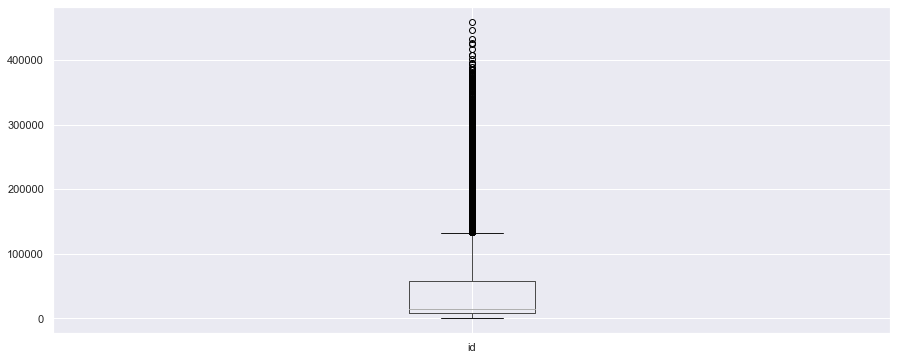

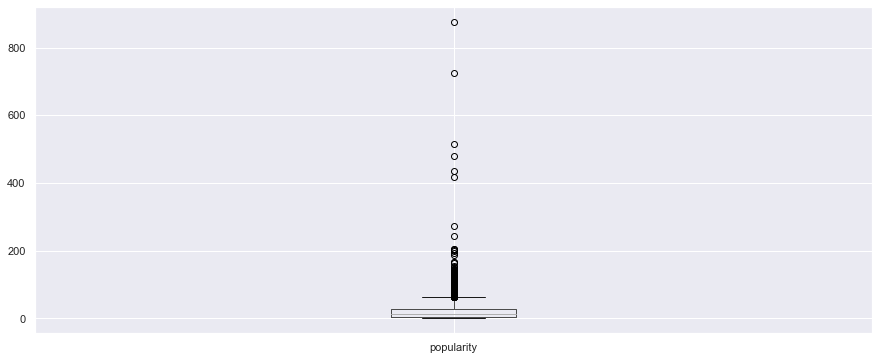

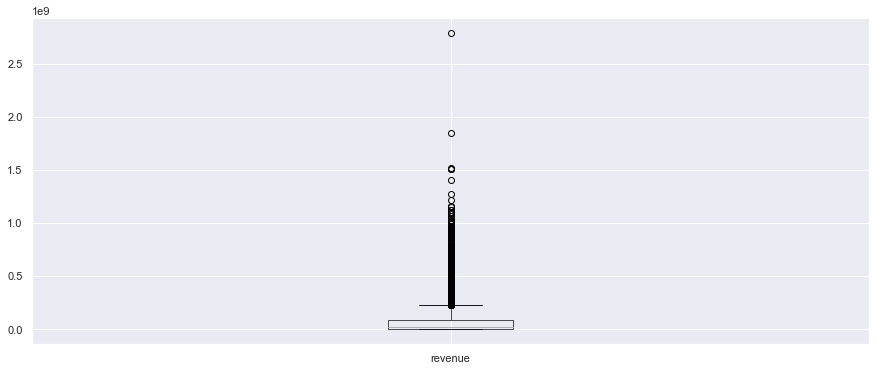

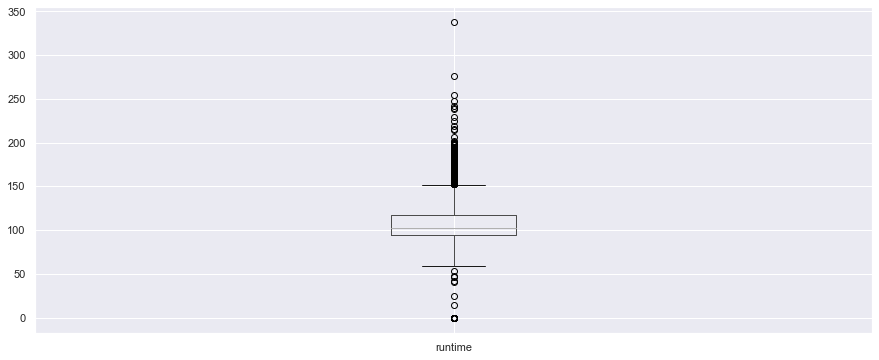

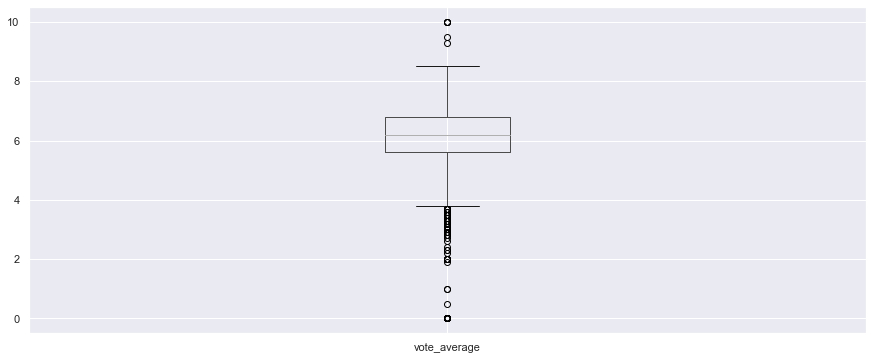

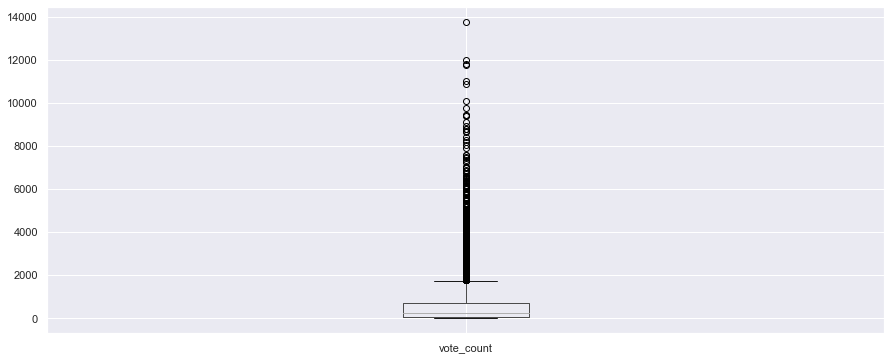

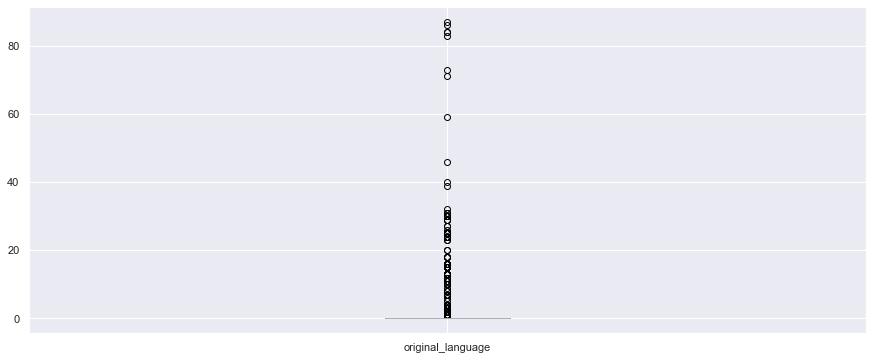

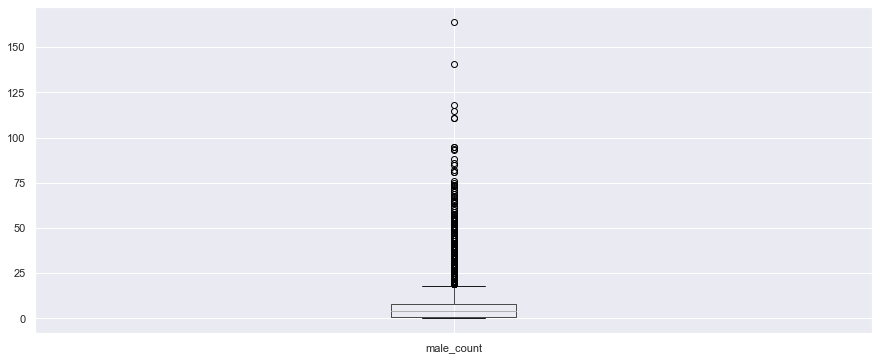

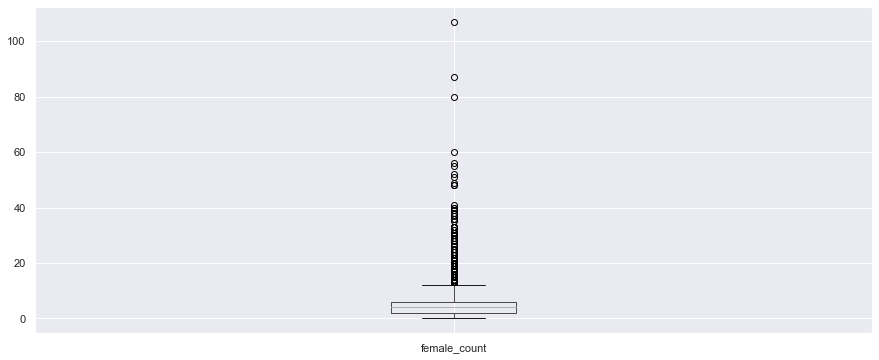

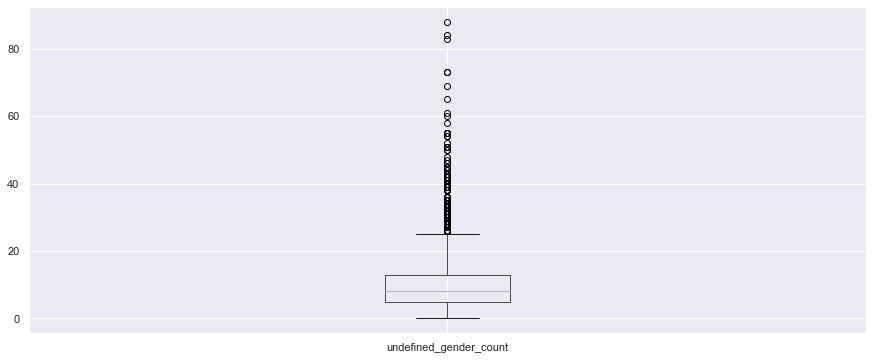

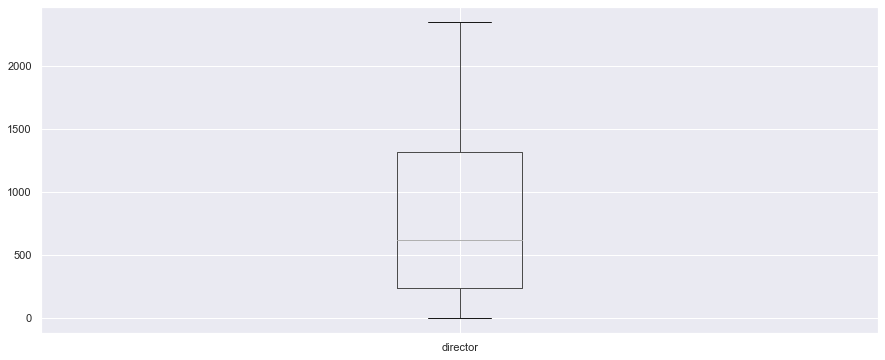

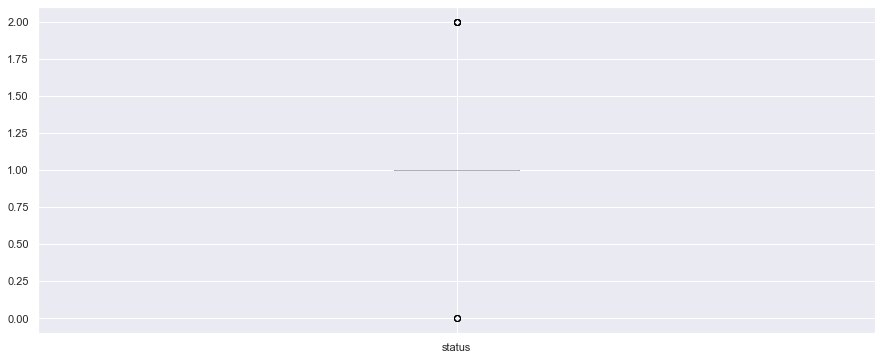

In [57]:
plt.figure(figsize=(3,6))
for i in range(0, df.shape[0]): 
    try:
        df.boxplot(column =[df.columns[i]], grid = True)
        st = "../plots/Plots DF1/boxplot_col_"+str(i)+".png"
        plt.savefig(st)
        plt.show()
    except: 
        pass

# Correlation and heatmap of Popularity and Genres

In [20]:
df_genres = pd.DataFrame()
key_list = list(genres.keys())
df_genres['popularity'] = df['popularity']
df_genres['revenue'] = df['revenue']
df_genres['budget'] = df['budget']

for j in range(0, len(genres)):
    col_t = []
    for i in range(0, df.shape[0]):
        t = json.loads(df.loc[i, "genres"])
        if(t.count(j) > 0):
            col_t.append(1)
        else:
            col_t.append(0)
    df_genres[key_list[j]] = col_t         # as value = index for value list


In [21]:
df_genres

popularity     revenue     budget  Action  Adventure  Fantasy  \
0     150.437577  2787965087  237000000       1          1        1   
1     139.082615   961000000  300000000       1          1        1   
2     107.376788   880674609  245000000       1          1        0   
3     112.312950  1084939099  250000000       1          0        0   
4      43.926995   284139100  260000000       1          1        0   
...          ...         ...        ...     ...        ...      ...   
4798   14.269792     2040920     220000       1          0        0   
4799    0.642552           0       9000       0          0        0   
4800    1.444476           0          0       0          0        0   
4801    0.857008           0          0       0          0        0   
4802    1.929883           0          0       0          0        0   

      Science Fiction  Crime  Drama  Thriller  ...  Comedy  Romance  Horror  \
0                   1      0      0         0  ...       0        0       0   
1                   0      0      0         0  ...       0        0       0   
2                   0      1      0         0  ...       0        0       0   
3                   0      1      1         1  ...       0        0       0   
4                   1      0      0         0  ...       0        0       0   
...               ...    ...    ...       ...  ...     ...      ...     ...   
4798                0      1      0         1  ...       0        0       0   
4799                0      0      0         0  ...       1        1       0   
4800                0      0      1         0  ...       1        1       0   
4801                0      0      0         0  ...       0        0       0   
4802                0      0      0         0  ...       0        0       0   

      Mystery  History  War  Music  Documentary  Foreign  TV Movie  
0           0        0    0      0            0        0         0  
1           0        0    0      0            0        0         0  
2           0        0    0      0            0        0         0  
3           0        0    0      0            0        0         0  
4           0        0    0      0            0        0         0  
...       ...      ...  ...    ...          ...      ...       ...  
4798        0        0    0      0            0        0         0  
4799        0        0    0      0            0        0         0  
4800        0        0    0      0            0        0         1  
4801        0        0    0      0            0        0         0  
4802        0        0    0      0            1        0         0  

[4803 rows x 23 columns]

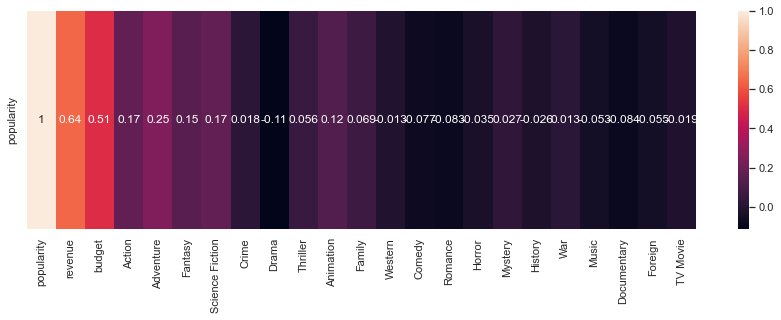

In [22]:
plt.figure(figsize=(15,4))
sb.heatmap(df_genres.corr().loc[['popularity'],:],annot=True)   # heatmap to show the correaltion between columns
st = "../plots/Plots DF1/heatmap_popularity_genres.png"
plt.savefig(st)
plt.show()

In [23]:
corr_list = []
for (col1,colval1) in df_genres.iloc[1:, 2:].iteritems():  
        t1 = []
        try:
            t = df_genres[col1]. corr(df_genres['popularity']) 
            if(t > 0.5 or t < -0.5):
                t1.append(col1)
                t1.append('popularity')
                t1.append(t)
                corr_list.append(t1)
        except:
            pass
        
if(len(corr_list) == 0):
    print('None of the given class type is highly correlated with popularity')
        
for i in range(0, len(corr_list)):
    print('Correlation between '+corr_list[i][0]+' and '+corr_list[i][1]+' is '+str(corr_list[i][2]))

Correlation between budget and popularity is 0.5054139990665325


# Correlation and heatmap of Revenue and Genres

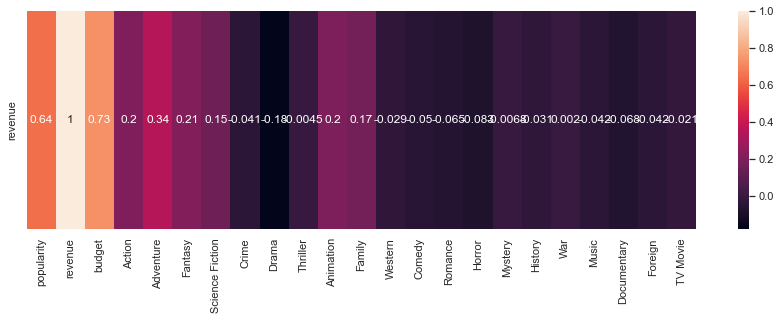

In [24]:
plt.figure(figsize=(15,4))
sb.heatmap(df_genres.corr().loc[['revenue'],:],annot=True)   # heatmap to show the correaltion between columns 
st = "../plots/Plots DF1/heatmap_revenue_genres.png"
plt.savefig(st)
plt.show()

In [25]:
corr_list = []
for (col1,colval1) in df_genres.iloc[1:, 2:-1].iteritems():  
        t1 = []
        try:
            t = df_genres[col1]. corr(df_genres['revenue']) 
            if(t > 0.5 or t < -0.5):
                t1.append(col1)
                t1.append('revenue')
                t1.append(t)
                corr_list.append(t1)
        except:
            pass
        
if(len(corr_list) == 0):
    print('None of the given class type is highly correlated with revenue')
        
for i in range(0, len(corr_list)):
    print('Correlation between '+corr_list[i][0]+' and '+corr_list[i][1]+' is '+str(corr_list[i][2]))

Correlation between budget and revenue is 0.7308228569244616


# Printing Mean Popularity and revenue for each genres type

In [26]:
popu_mean = []
revenue_mean = []
budget_mean = []
key_list = list(genres.keys())

for j in range(3, df_genres.shape[1]):
    popularity_j = 0.0
    revenue_j = 0.0
    budget_j = 0.0
    count = 0.0
    for i in range(0, df_genres.shape[0]): 
        if df_genres.loc[i, df_genres.columns[j]] == 1:
            popularity_j = popularity_j + df_genres.loc[i, "popularity"]
            revenue_j = revenue_j + df_genres.loc[i, "revenue"]
            budget_j = budget_j + df_genres.loc[i, "budget"]
            count = count + 1
    if count == 0:
        popu_mean.append(0.0)
        revenue_mean.append(0.0)
        budget_mean.append(0.0)
    else:
        popu_mean.append(float(popularity_j/count))
        revenue_mean.append(float(revenue_j/count))
        budget_mean.append(float(budget_j/count))
df_mean = pd.DataFrame(np.column_stack([key_list,popu_mean,revenue_mean,budget_mean]), columns =['Genres', 'Popularity mean', 'Revenue mean','Budget mean'])


df_mean['Popularity mean'] = df_mean['Popularity mean'].astype(str).astype(float)
df_mean['Revenue mean'] = df_mean['Revenue mean'].astype(str).astype(float)
df_mean['Budget mean'] = df_mean['Budget mean'].astype(str).astype(float)


In [27]:
df_mean

Genres  Popularity mean  Revenue mean   Budget mean
0            Action        30.940382  1.412131e+08  5.151075e+07
1         Adventure        39.268042  2.086602e+08  6.632686e+07
2           Fantasy        36.387043  1.933542e+08  6.356061e+07
3   Science Fiction        36.451806  1.524565e+08  5.186555e+07
4             Crime        22.853274  6.615066e+07  2.784981e+07
5             Drama        17.764853  5.211623e+07  2.067832e+07
6          Thriller        24.460077  8.104429e+07  3.196821e+07
7         Animation        38.813439  2.256930e+08  6.646590e+07
8            Family        27.832849  1.623455e+08  5.071951e+07
9           Western        18.236279  4.624596e+07  2.707870e+07
10           Comedy        18.221001  7.128950e+07  2.531342e+07
11          Romance        15.962426  6.000239e+07  2.031136e+07
12           Horror        18.295915  4.354508e+07  1.457403e+07
13          Mystery        24.586827  7.830093e+07  3.074449e+07
14          History        17.444839  5.752356e+07  2.990347e+07
15              War        23.777289  8.415587e+07  3.528246e+07
16            Music        13.101512  4.845595e+07  1.590795e+07
17      Documentary         3.945724  9.838888e+06  2.653288e+06
18          Foreign         0.686787  3.646515e+05  6.580884e+05
19         TV Movie         6.389415  0.000000e+00  1.150000e+06

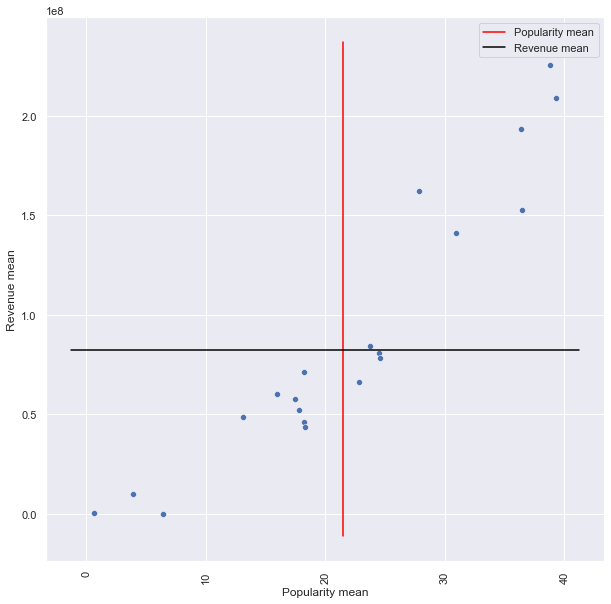

In [28]:
pop_mean = df['popularity'].mean()
rf_mean = df['revenue'].mean()

plt.figure(figsize=(10,10))
plt.xticks(rotation = 'vertical') 
sb.scatterplot(x = df_mean['Popularity mean'] , y = df_mean['Revenue mean'], data = df_mean)

axes = plt.gca()

y_val_p = np.array(axes.get_ylim())
x_val_p = np.array([pop_mean,pop_mean])
plt.plot(x_val_p, y_val_p,color = 'red',label = 'Popularity mean')

axes = plt.gca()
y_val_r = np.array([rf_mean,rf_mean])
x_val_r = np.array(axes.get_xlim())
plt.plot(x_val_r, y_val_r,color = 'black',label = 'Revenue mean')


plt.legend(loc='best')
st = "../plots/Plots DF1/mean_popularity_revenue.png"
plt.savefig(st)
plt.show()

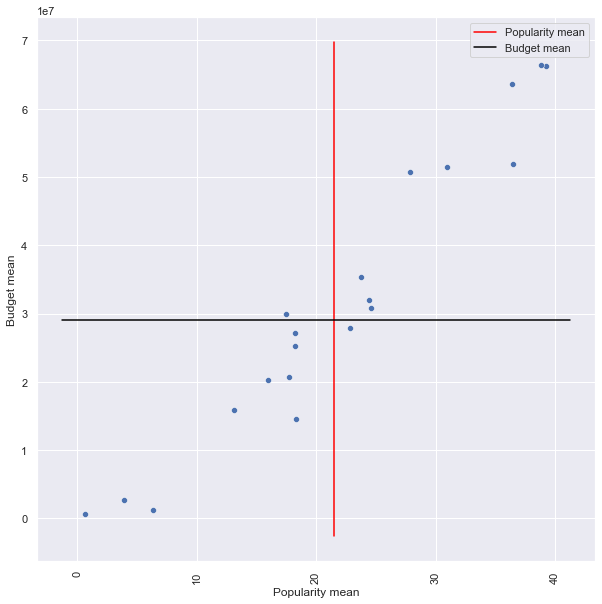

In [29]:
pop_mean = df['popularity'].mean()
bu_mean = df['budget'].mean()

plt.figure(figsize=(10,10))
plt.xticks(rotation = 'vertical') 
sb.scatterplot(x = df_mean['Popularity mean'] , y = df_mean['Budget mean'], data = df_mean)

axes = plt.gca()

y_val_p = np.array(axes.get_ylim())
x_val_p = np.array([pop_mean,pop_mean])
plt.plot(x_val_p, y_val_p,color = 'red',label = 'Popularity mean')

axes = plt.gca()
y_val_r = np.array([bu_mean,bu_mean])
x_val_r = np.array(axes.get_xlim())
plt.plot(x_val_r, y_val_r,color = 'black',label = 'Budget mean')


plt.legend(loc='best')
st = "../plots/Plots DF1/mean_popularity_budget.png"
plt.savefig(st)
plt.show()

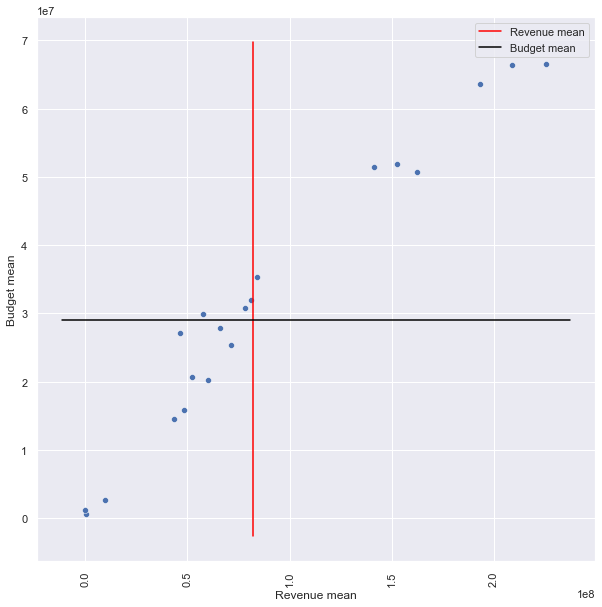

In [30]:
rf_mean = df['revenue'].mean()
bu_mean = df['budget'].mean()

plt.figure(figsize=(10,10))
plt.xticks(rotation = 'vertical') 
sb.scatterplot(x = df_mean['Revenue mean'] , y = df_mean['Budget mean'], data = df_mean)

axes = plt.gca()

y_val_p = np.array(axes.get_ylim())
x_val_p = np.array([rf_mean,rf_mean])
plt.plot(x_val_p, y_val_p,color = 'red',label = 'Revenue mean')

axes = plt.gca()
y_val_r = np.array([bu_mean,bu_mean])
x_val_r = np.array(axes.get_xlim())
plt.plot(x_val_r, y_val_r,color = 'black',label = 'Budget mean')

plt.legend(loc='best')
st = "../plots/Plots DF1/mean_revenue_budget.png"
plt.savefig(st)
plt.show()

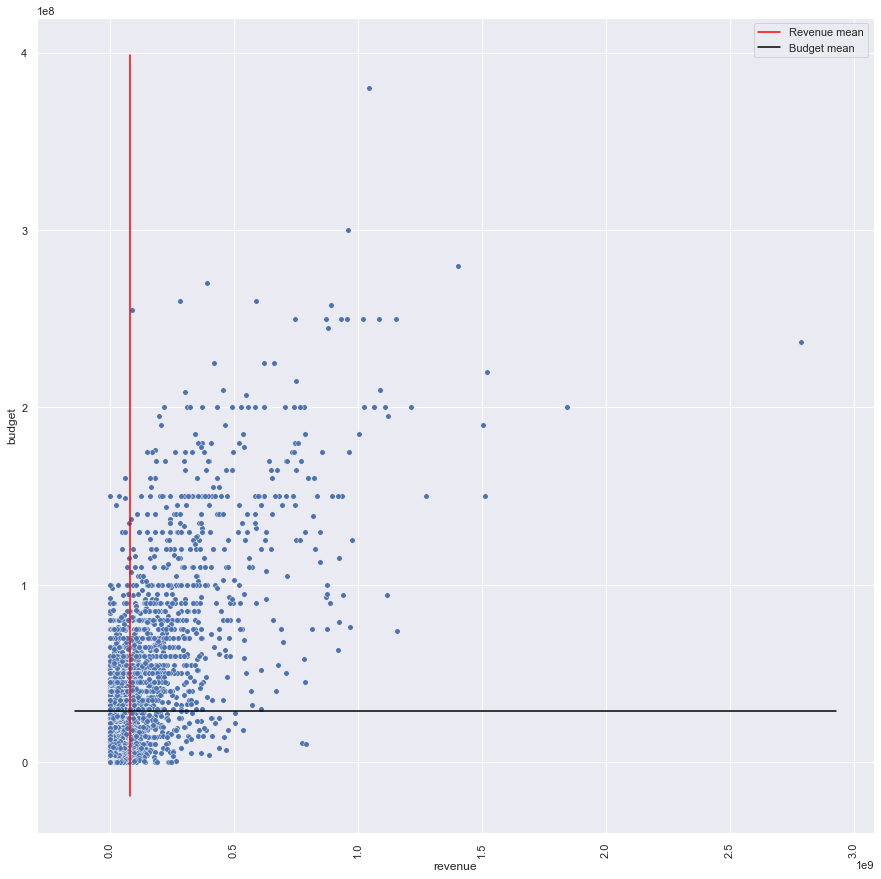

In [31]:
rf_mean = df['revenue'].mean()
bu_mean = df['budget'].mean()

plt.figure(figsize=(15,15))
plt.xticks(rotation = 'vertical') 
sb.scatterplot(x = df['revenue'] , y = df['budget'], data = df, s = 30)

axes = plt.gca()

y_val_p = np.array(axes.get_ylim())
x_val_p = np.array([rf_mean,rf_mean])
plt.plot(x_val_p, y_val_p,color = 'red',label = 'Revenue mean')

axes = plt.gca()
y_val_r = np.array([bu_mean,bu_mean])
x_val_r = np.array(axes.get_xlim())
plt.plot(x_val_r, y_val_r,color = 'black',label = 'Budget mean')

plt.legend(loc='best')
st = "../plots/Plots DF1/mean_revenue_budget_complete_dataset.png"
plt.savefig(st)
plt.show()

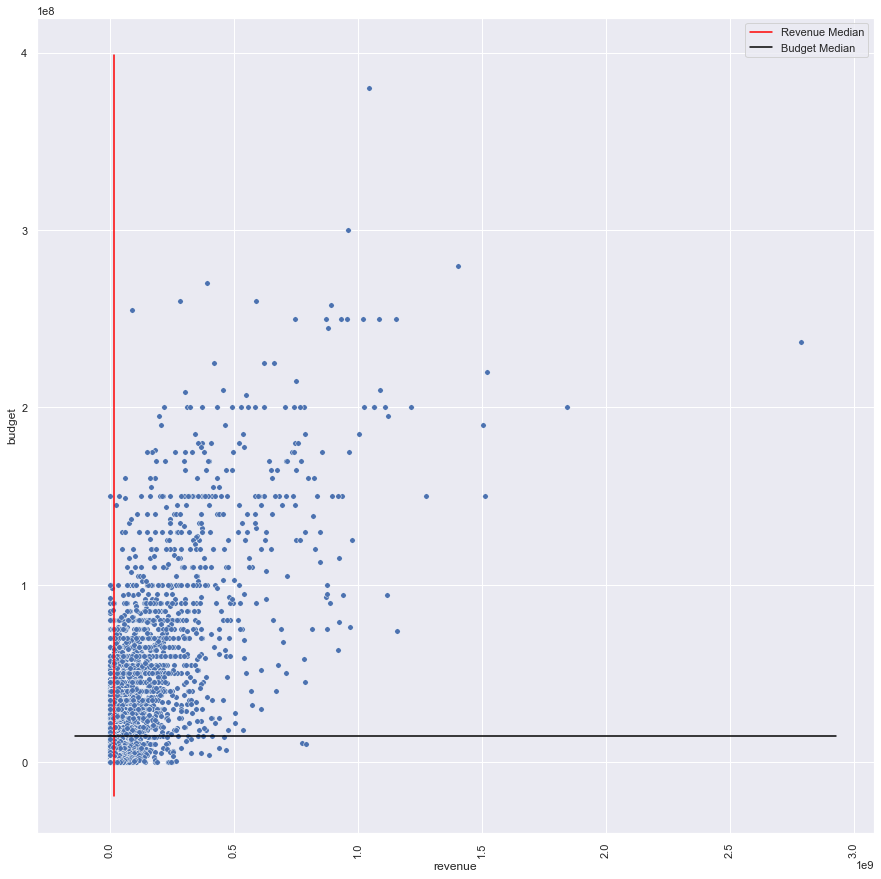

In [32]:
rf_median = df['revenue'].median()
bu_median = df['budget'].median()

plt.figure(figsize=(15,15))
plt.xticks(rotation = 'vertical') 
sb.scatterplot(x = df['revenue'] , y = df['budget'], data = df, s = 30)

axes = plt.gca()

y_val_p = np.array(axes.get_ylim())
x_val_p = np.array([rf_median,rf_median])
plt.plot(x_val_p, y_val_p,color = 'red',label = 'Revenue Median')

axes = plt.gca()
y_val_r = np.array([bu_median,bu_median])
x_val_r = np.array(axes.get_xlim())
plt.plot(x_val_r, y_val_r,color = 'black',label = 'Budget Median')

plt.legend(loc='best')
st = "../plots/Plots DF1/median_revenue_budget_complete_dataset.png"
plt.savefig(st)
plt.show()

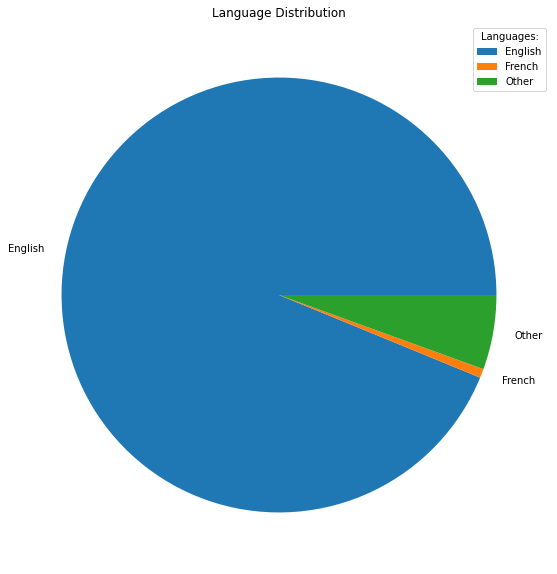

In [50]:
lang = dict(df.original_language.value_counts())
counts = []
labels = []
languages_rev = dict(zip(languages.values(), languages.keys()))
# counts.append(lang[0])
t = 0
for i in lang.keys():
    if(i == 0):
        counts.append(lang[i])
    elif(i == 1):
        counts.append(lang[i])
    else:
        t += lang[i]
counts.append(t)
labels.append("English")
labels.append("French") 
labels.append("Other") 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("Language Distribution")
plt.pie(counts, labels = labels)
plt.legend(title = "Languages:")
plt.savefig("../plots/Plots DF1/piechart_language.jpg")
plt.show() 


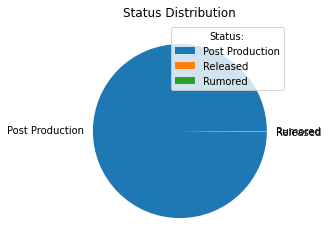

In [43]:
t = df['status'].value_counts()
plt.title("Status Distribution")
plt.pie(t, labels = status)
plt.legend(title = "Status:")
plt.savefig("../plots/Plots DF1/piechart_status.jpg")
plt.show() 


# Dataset After One-Hot Encoding

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
import json

In [6]:
os.chdir('../Datasets/')
with open("encode_info1.json") as fh:
    data = json.load(fh)
    
genres = data[0]
keywords = data[1]
languages = data[2]
production_countries = data[3]
production_companies = data[4]
character = data[5]
gender = data[6]
actorname = data[7]
director_name = data[8]
status = data[9]

In [7]:
os.chdir('../Datasets/')
df_ohe = pd.read_csv("tmdb_prepro.csv")

In [8]:
df_ohe.head(2)

Unnamed: 0     budget     id                            original_title  \
0           0  237000000  19995                                    Avatar   
1           1  300000000    285  Pirates of the Caribbean: At World's End   

                                            overview  popularity release_date  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   2009-12-10   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   2007-05-19   

      revenue  runtime                                         tagline  ...  \
0  2787965087    162.0                     Enter the World of Pandora.  ...   
1   961000000    169.0  At the end of the world, the adventure begins.  ...   

    en   fr   es   de   it   ru   zh   ja   pt   ar  
0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 71 columns]

In [15]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 71 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              4803 non-null   int64  
 1   budget                                  4803 non-null   int64  
 2   id                                      4803 non-null   int64  
 3   original_title                          4803 non-null   object 
 4   overview                                4800 non-null   object 
 5   popularity                              4803 non-null   float64
 6   release_date                            4802 non-null   object 
 7   revenue                                 4803 non-null   int64  
 8   runtime                                 4803 non-null   float64
 9   tagline                                 3959 non-null   object 
 10  title                                   4803 non-null   obje

In [16]:
print("Shape: ", end=' ')
df_ohe.shape                          # Shape of the dataset

Shape:  

(4803, 71)

In [17]:
print("Summary of the Dataframe:")
df_ohe.describe()                     # summary of the Dataframe

Summary of the Dataframe:


Unnamed: 0        budget             id   popularity       revenue  \
count  4803.000000  4.803000e+03    4803.000000  4803.000000  4.803000e+03   
mean   2401.000000  2.904504e+07   57165.484281    21.492301  8.226064e+07   
std    1386.651002  4.072239e+07   88694.614033    31.816650  1.628571e+08   
min       0.000000  0.000000e+00       5.000000     0.000000  0.000000e+00   
25%    1200.500000  7.900000e+05    9014.500000     4.668070  0.000000e+00   
50%    2401.000000  1.500000e+07   14629.000000    12.921594  1.917000e+07   
75%    3601.500000  4.000000e+07   58610.500000    28.313505  9.291719e+07   
max    4802.000000  3.800000e+08  459488.000000   875.581305  2.787965e+09   

           runtime  vote_average    vote_count  original_language  \
count  4803.000000   4803.000000   4803.000000        4803.000000   
mean    106.830939      6.092172    690.217989           0.705184   
std      22.714124      1.194612   1234.585891           4.545905   
min      -1.000000      0.000000      0.000000           0.000000   
25%      94.000000      5.600000     54.000000           0.000000   
50%     103.000000      6.200000    235.000000           0.000000   
75%     117.500000      6.800000    737.000000           0.000000   
max     338.000000     10.000000  13752.000000          87.000000   

        male_count  ...           en           fr           es           de  \
count  4803.000000  ...  4803.000000  4803.000000  4803.000000  4803.000000   
mean      7.036852  ...     0.933791     0.090985     0.073079     0.054549   
std      11.176134  ...     0.248672     0.287617     0.260294     0.227122   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       1.000000  ...     1.000000     0.000000     0.000000     0.000000   
50%       4.000000  ...     1.000000     0.000000     0.000000     0.000000   
75%       8.000000  ...     1.000000     0.000000     0.000000     0.000000   
max     164.000000  ...     1.000000     1.000000     1.000000     1.000000   

                it           ru           zh           ja           pt  \
count  4803.000000  4803.000000  4803.000000  4803.000000  4803.000000   
mean      0.039142     0.038518     0.022278     0.020196     0.014158   
std       0.193953     0.192462     0.147601     0.140684     0.118154   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                ar  
count  4803.000000  
mean      0.013950  
std       0.117294  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 63 columns]

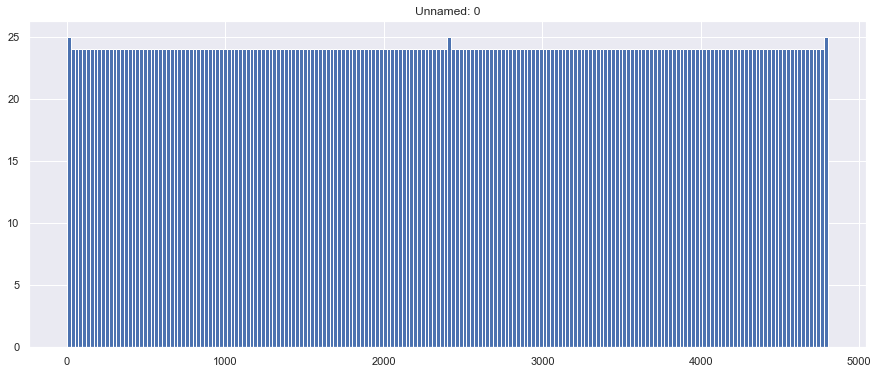

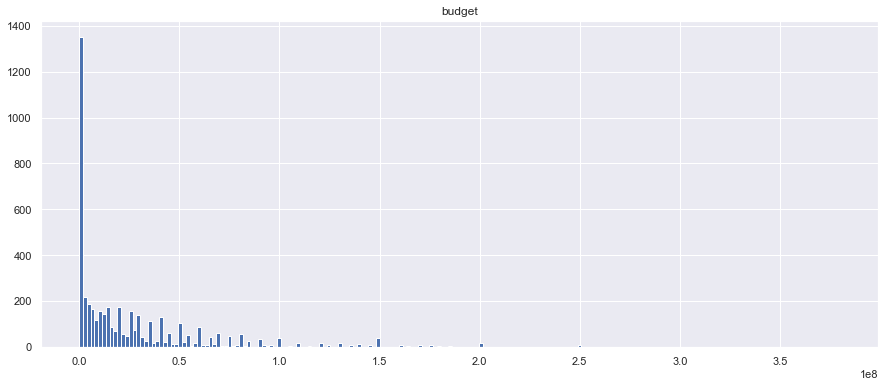

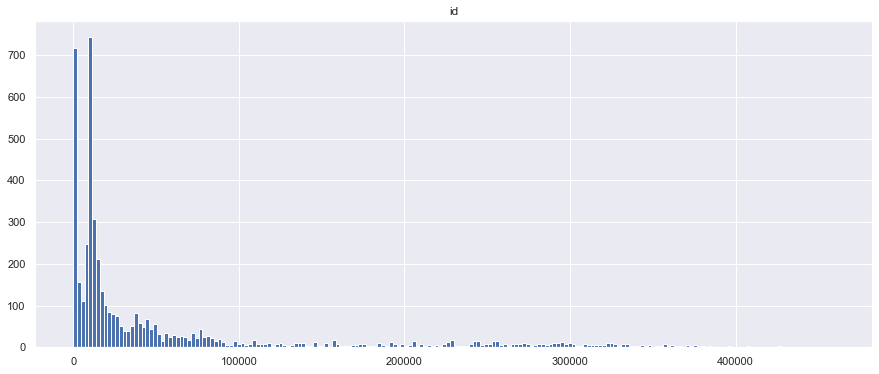

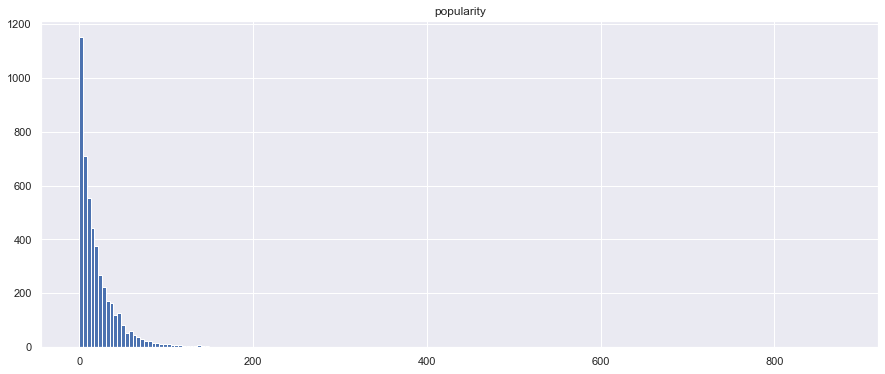

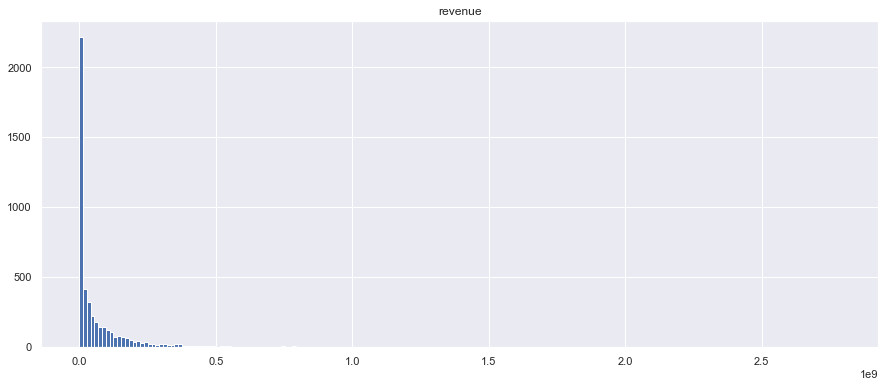

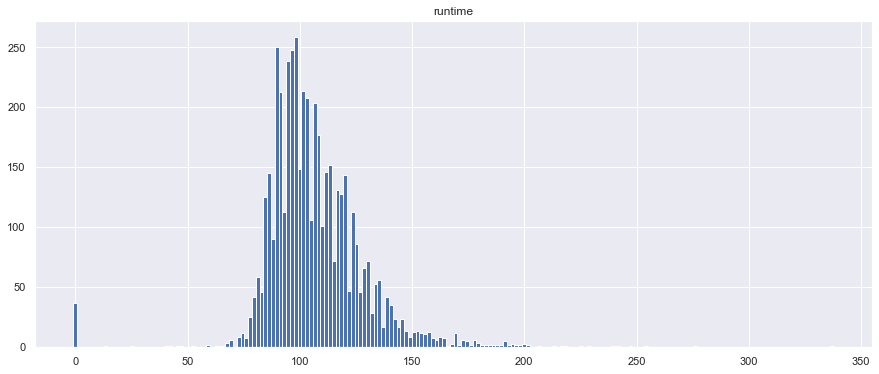

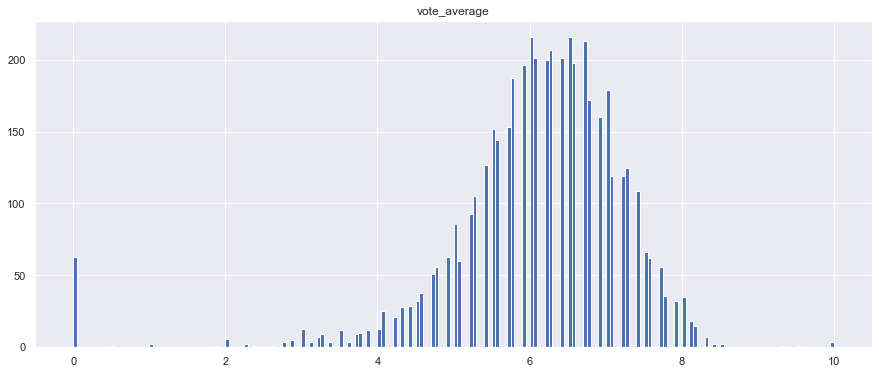

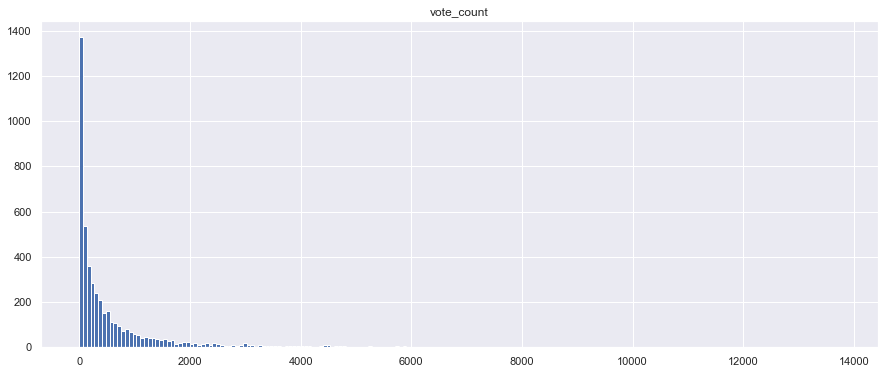

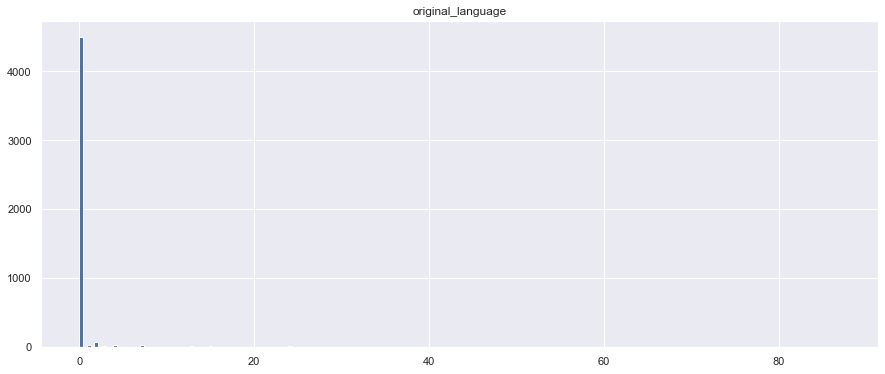

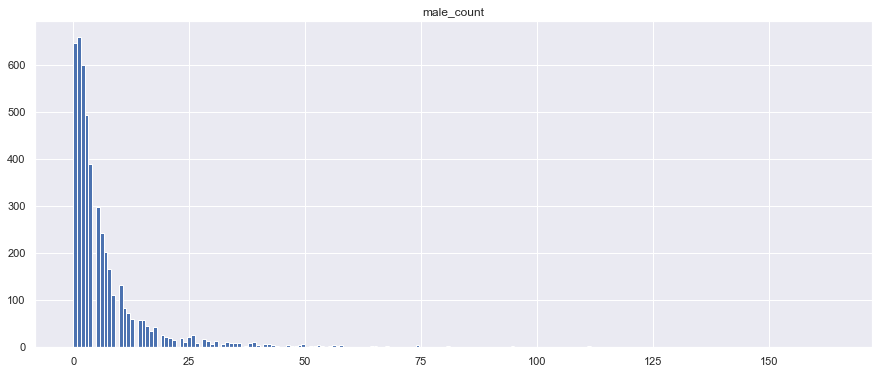

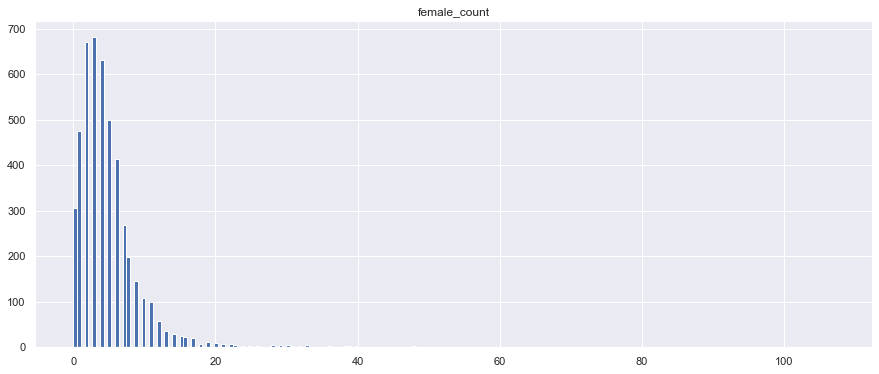

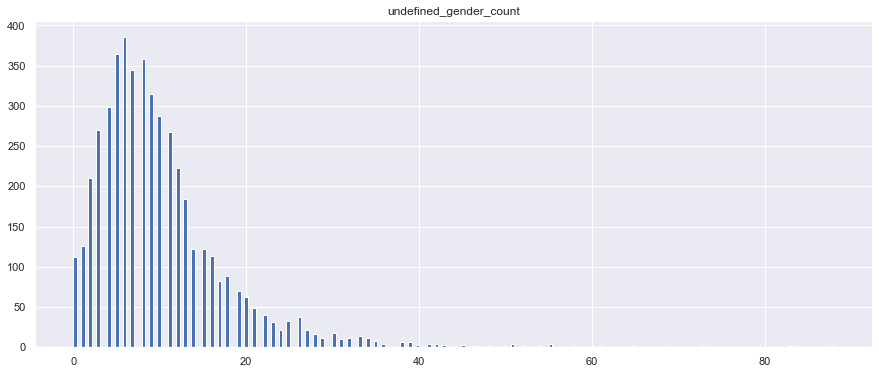

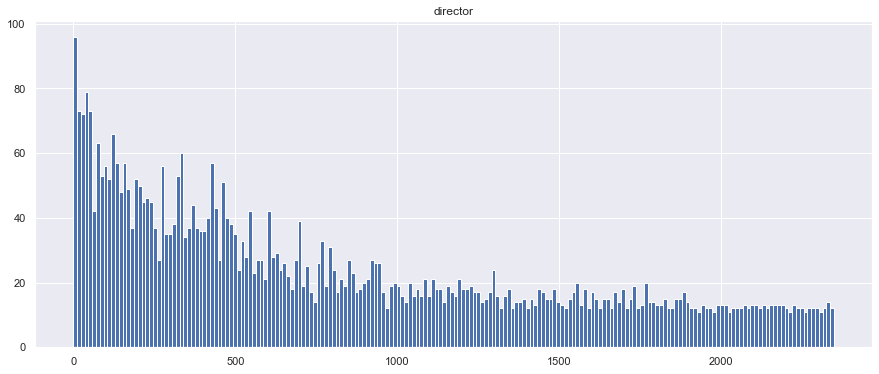

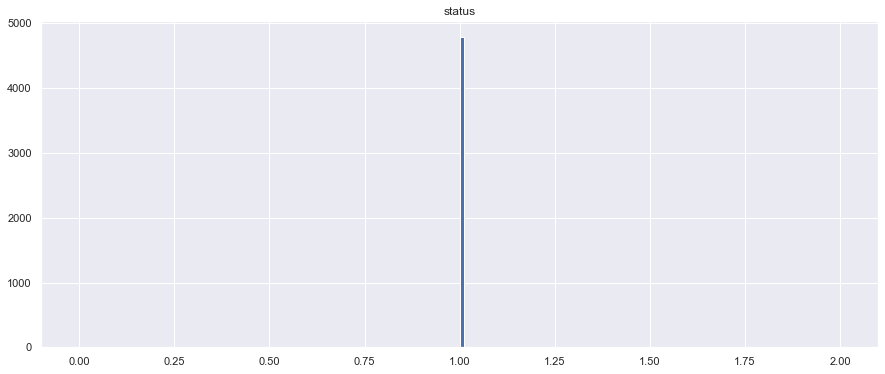

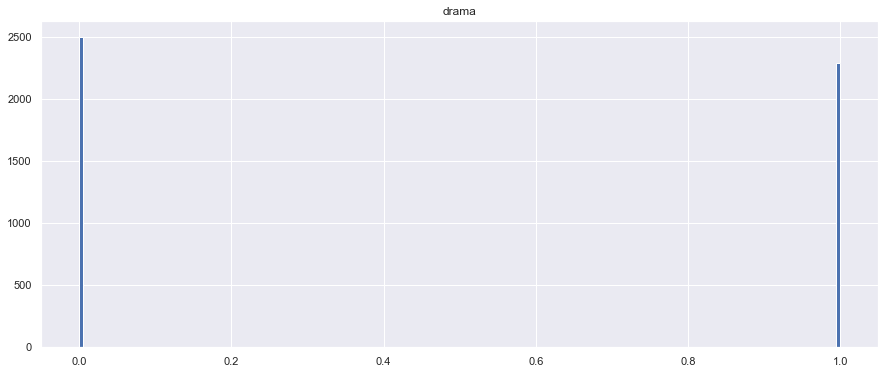

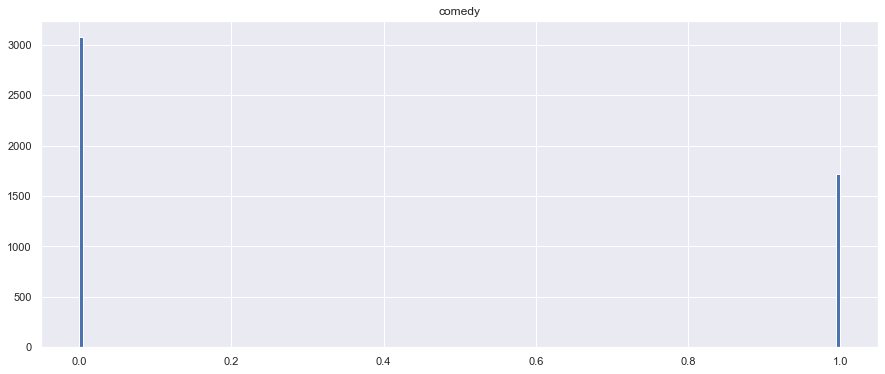

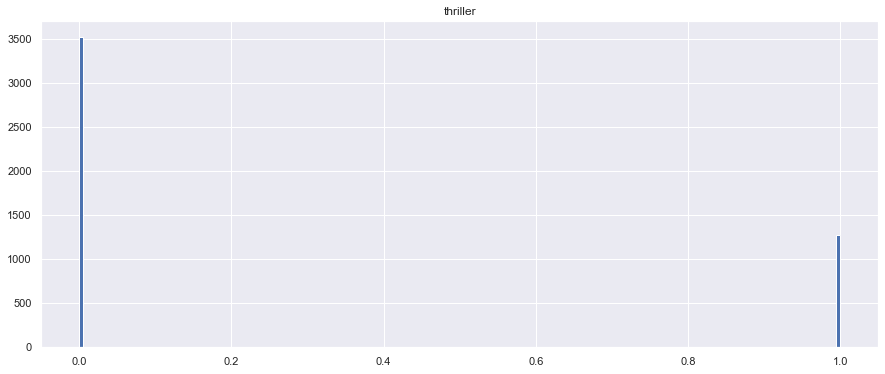

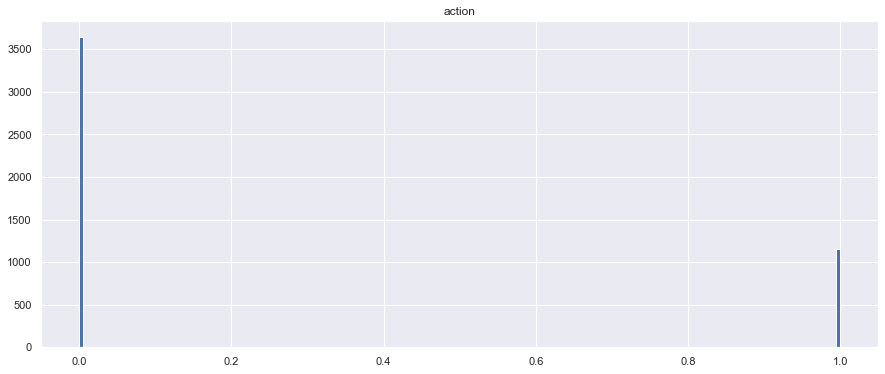

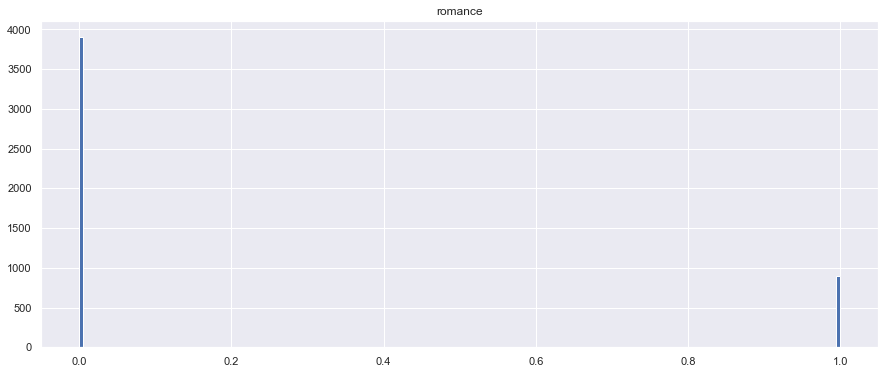

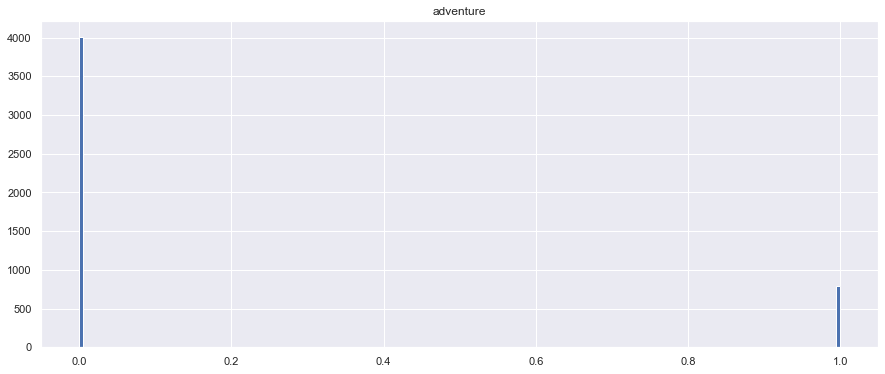

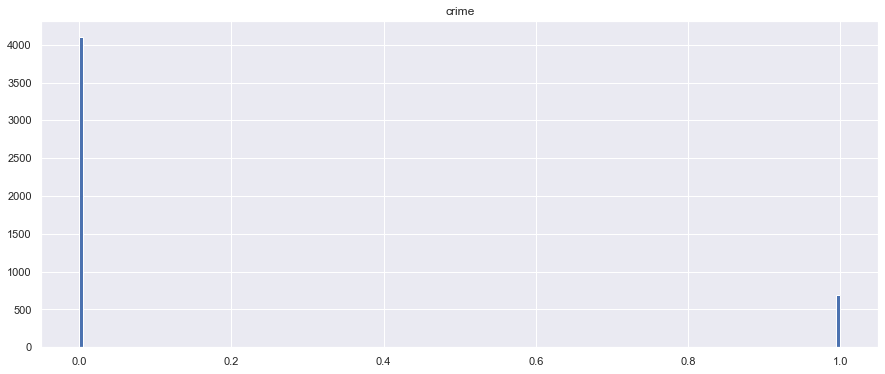

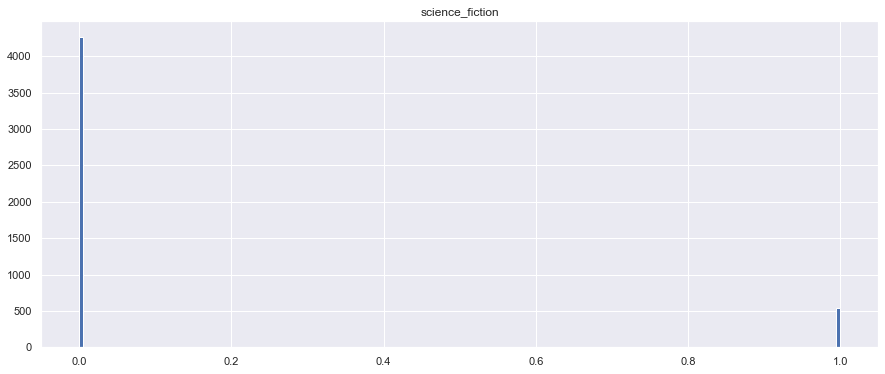

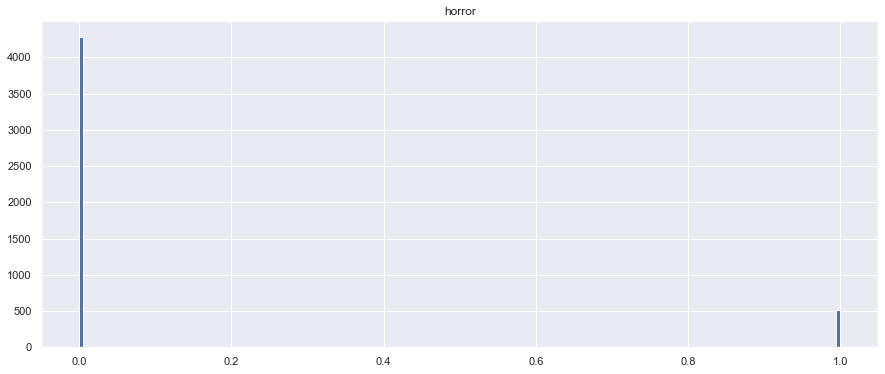

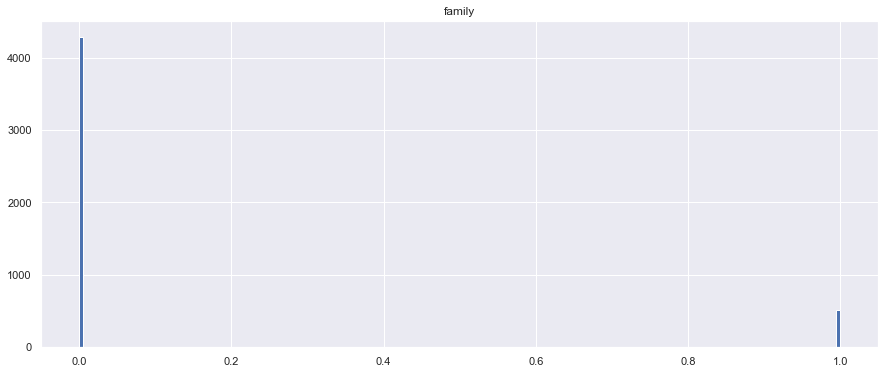

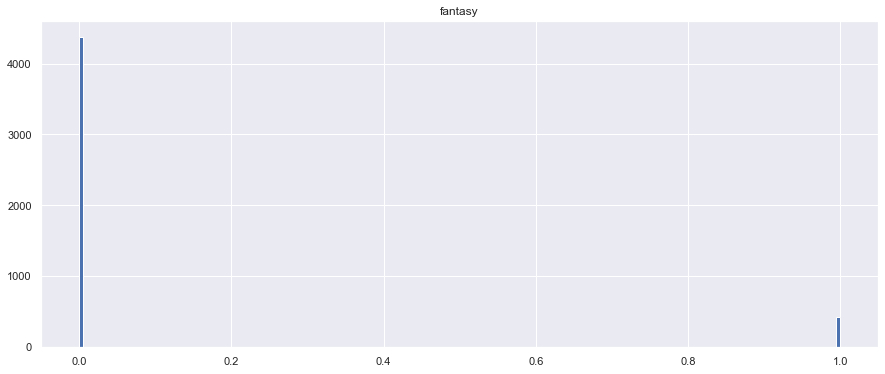

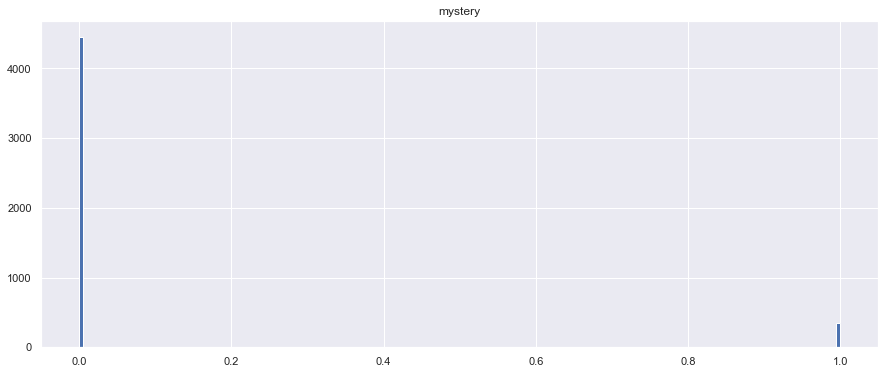

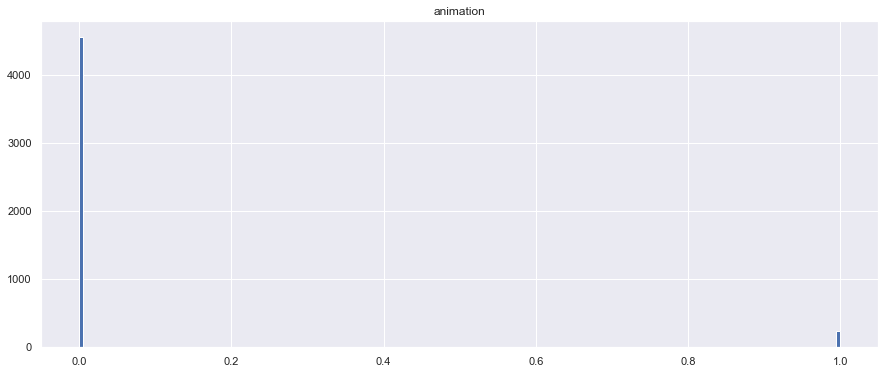

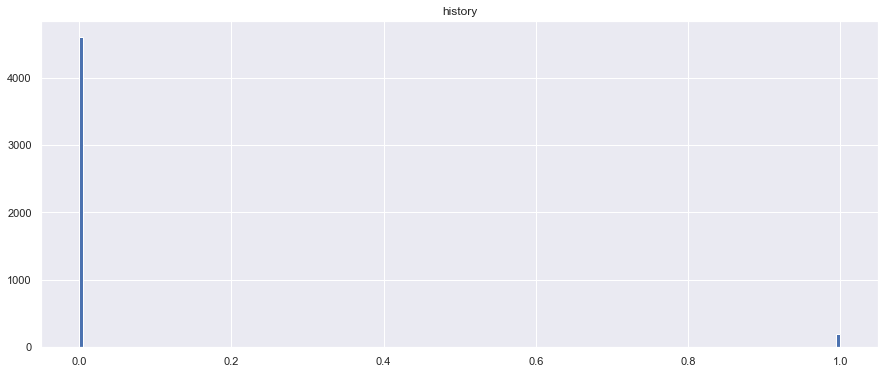

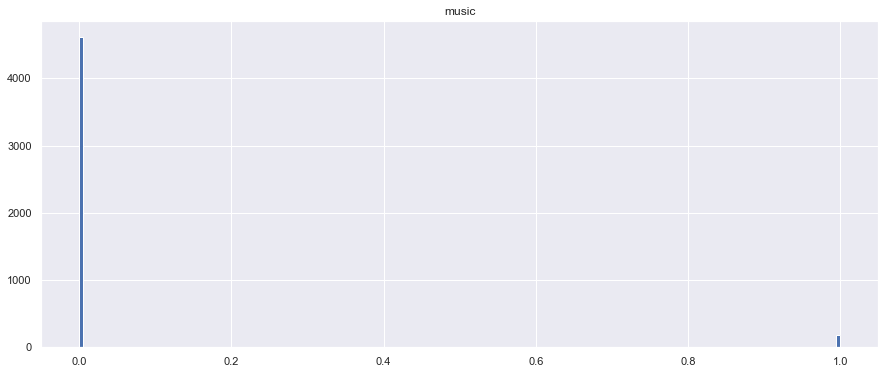

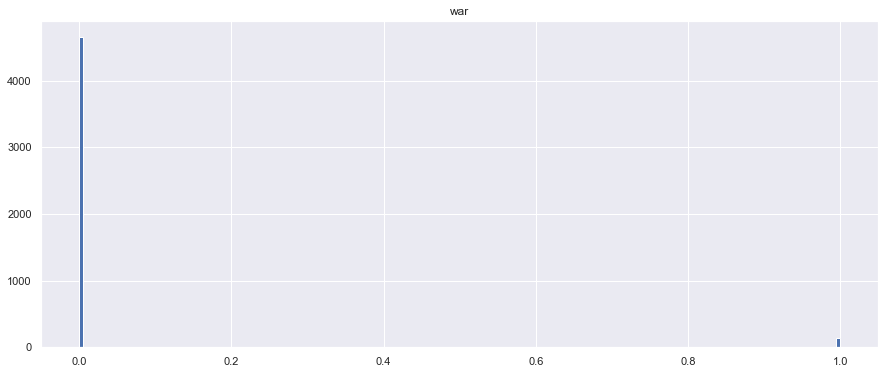

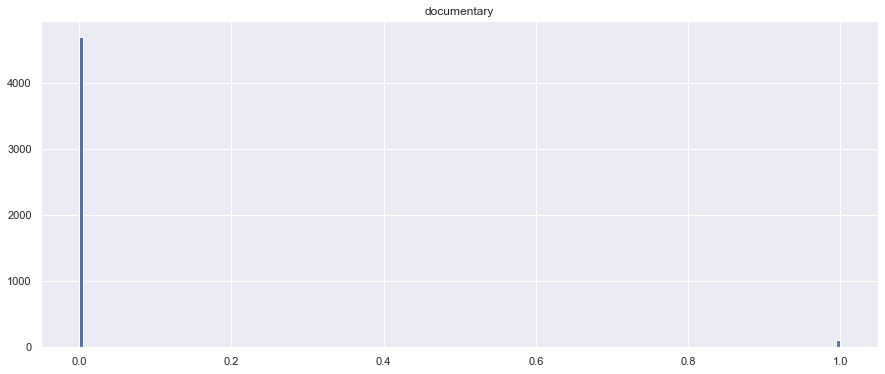

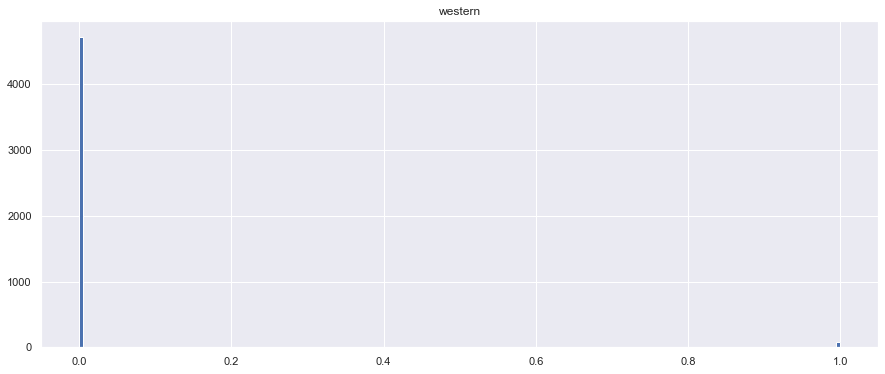

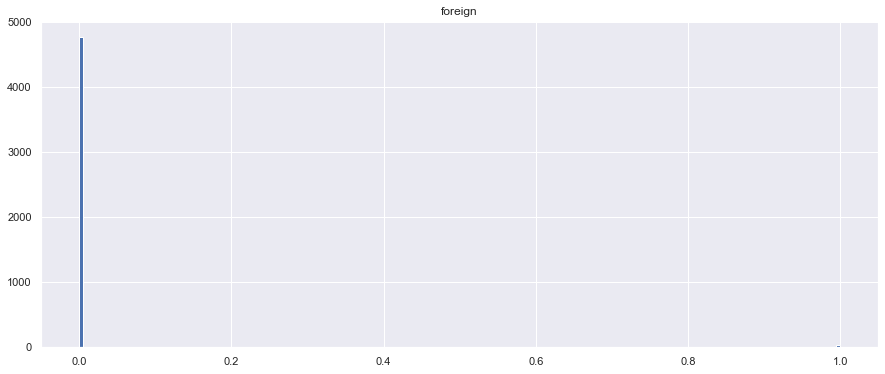

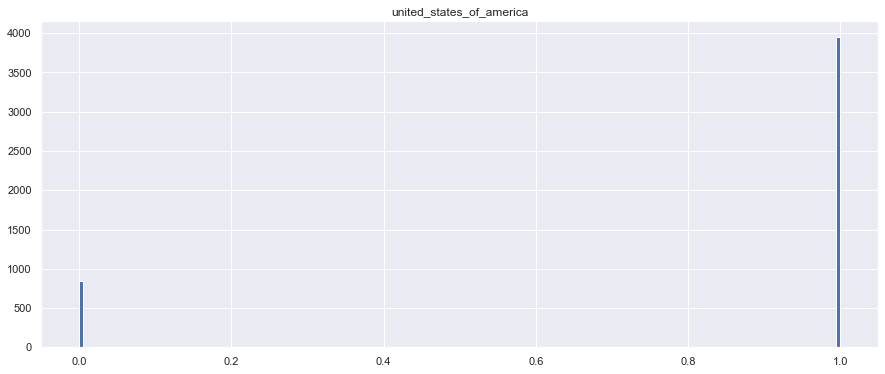

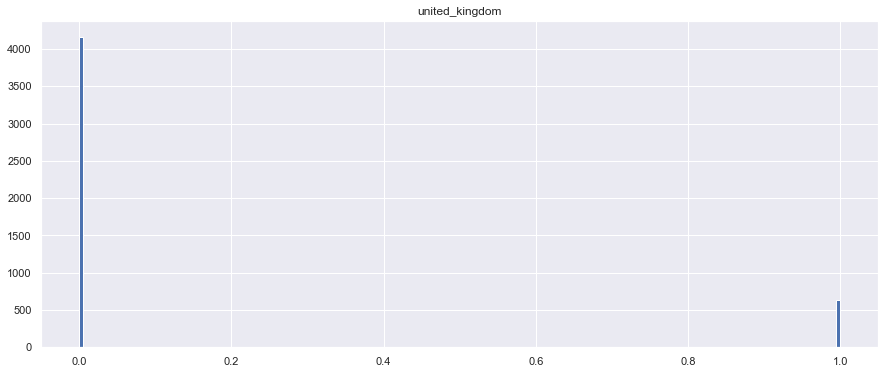

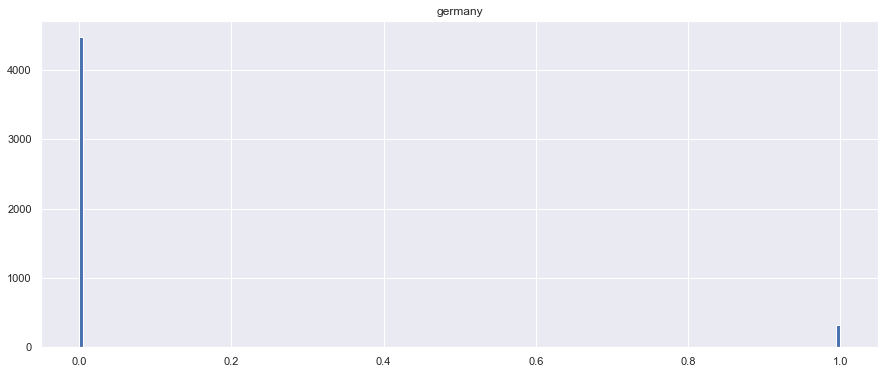

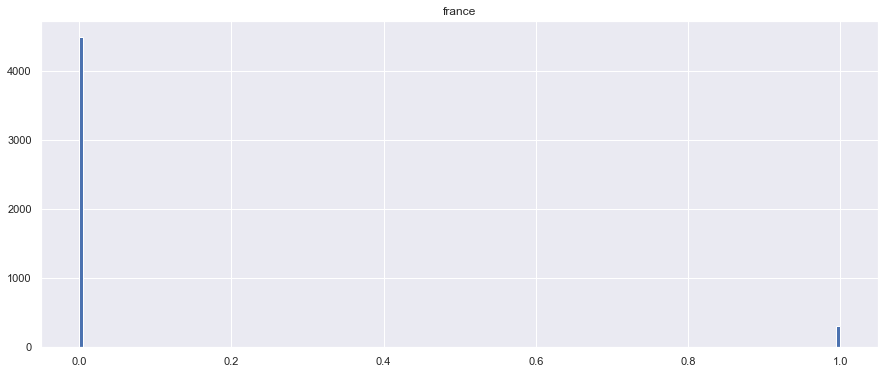

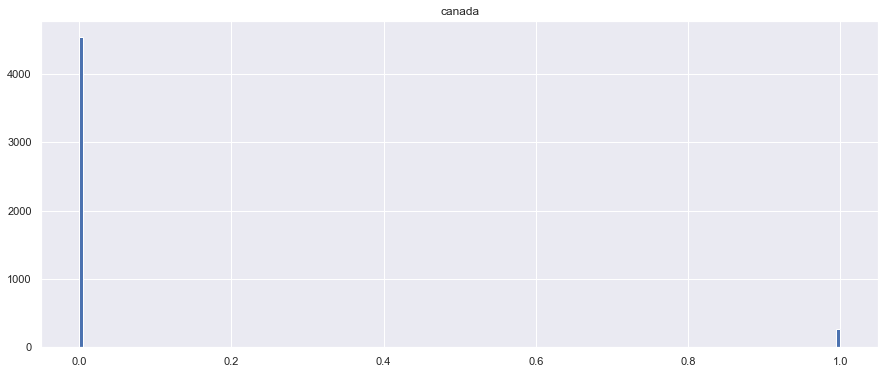

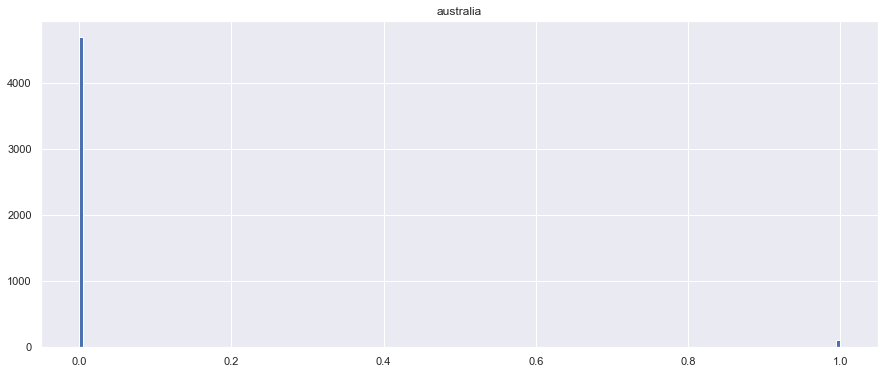

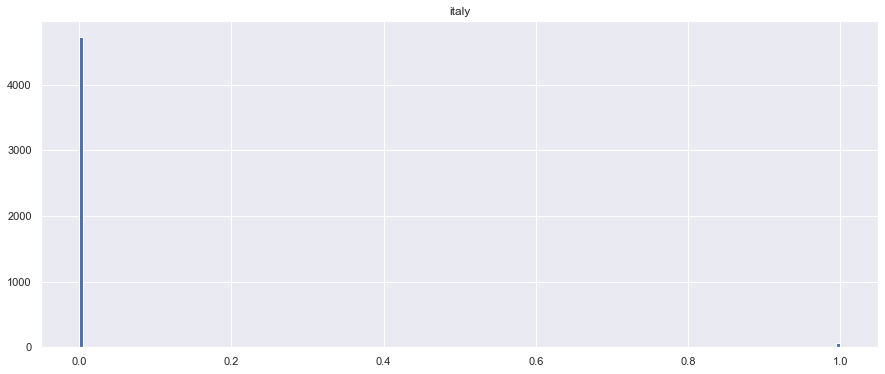

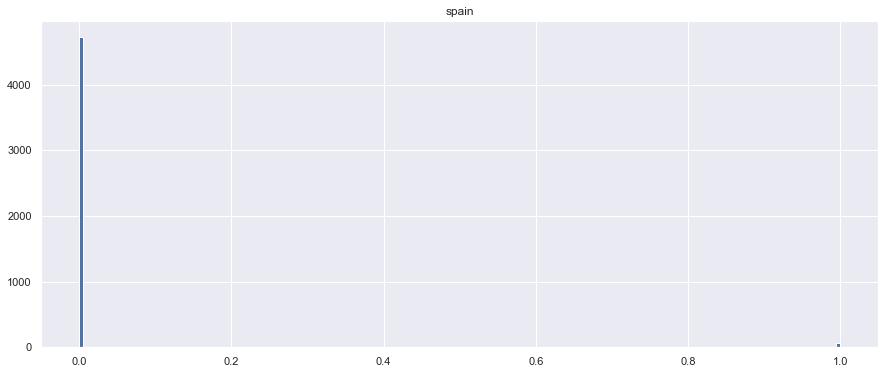

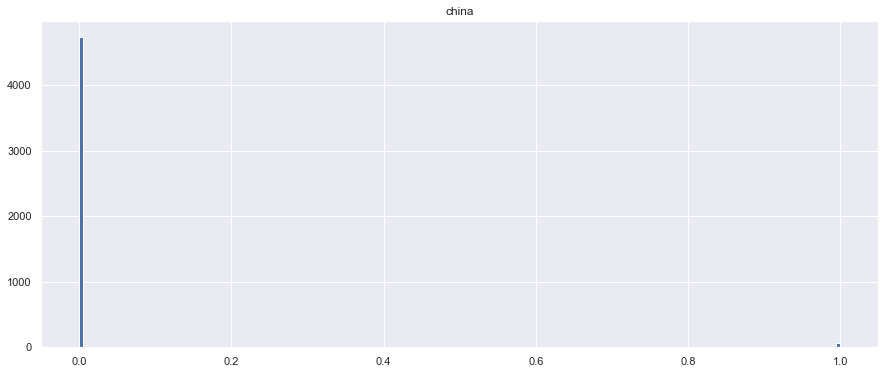

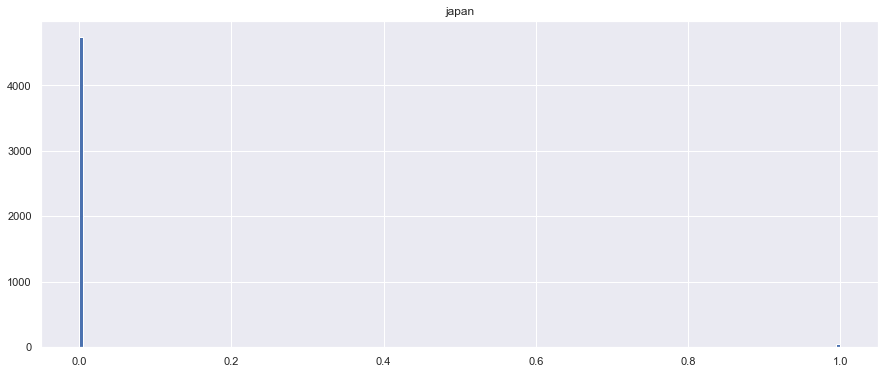

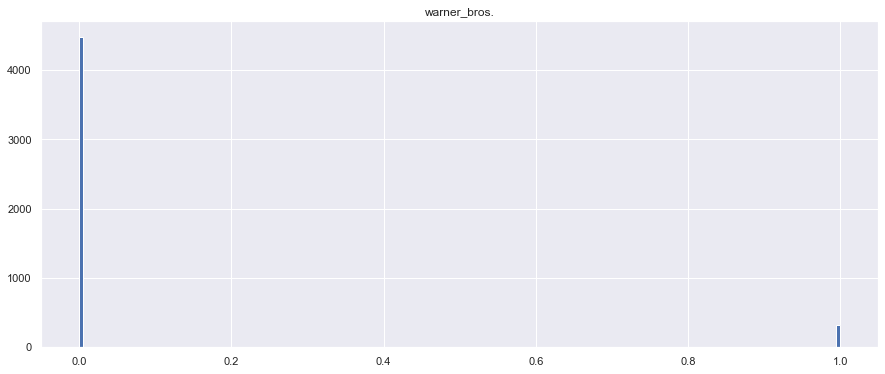

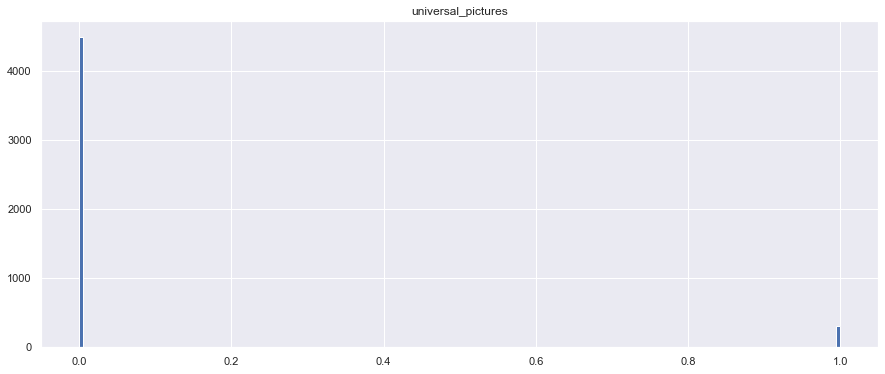

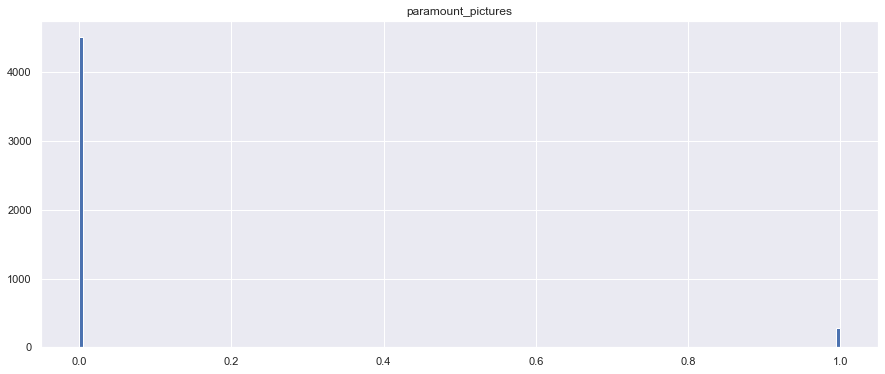

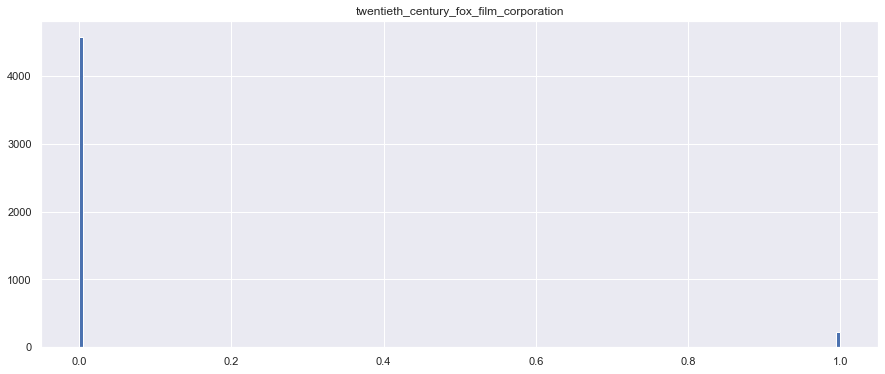

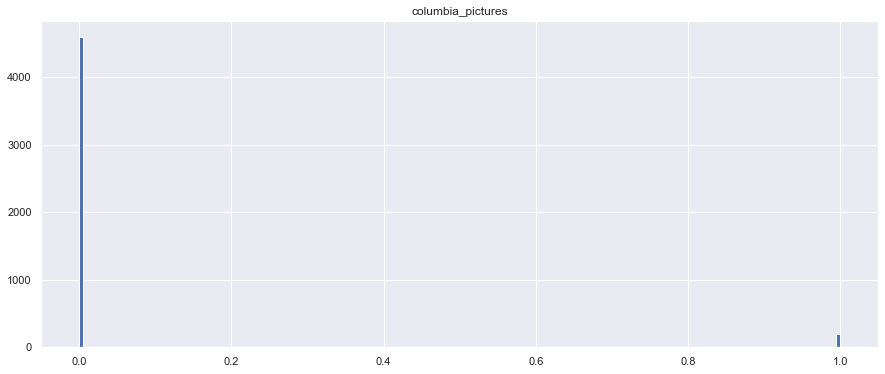

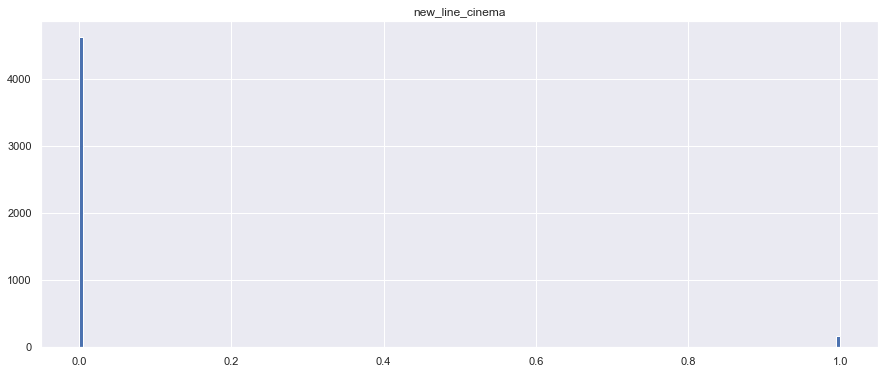

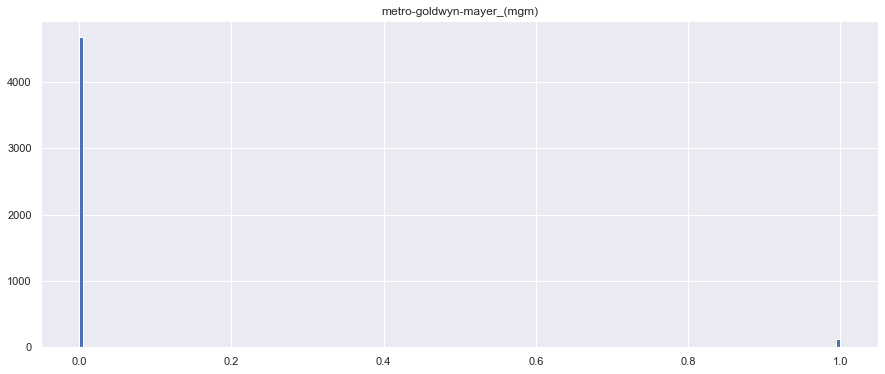

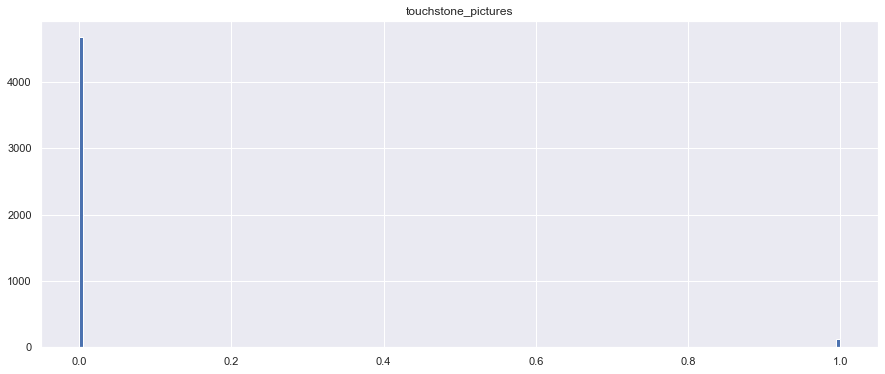

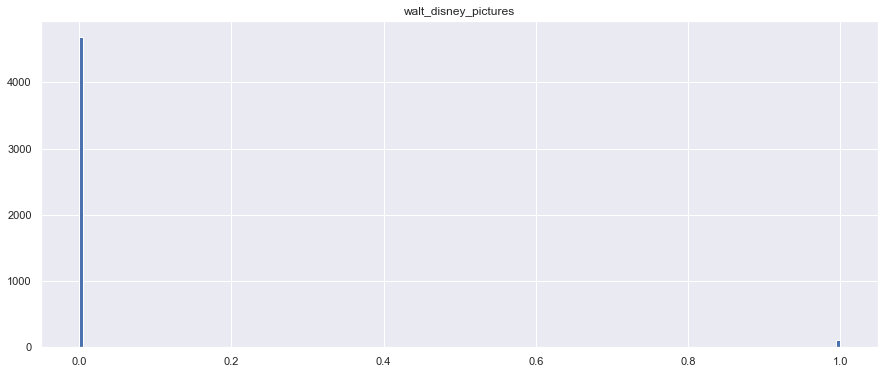

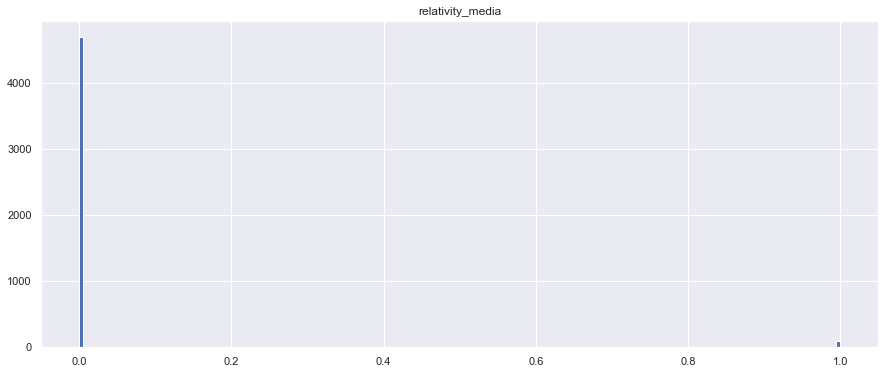

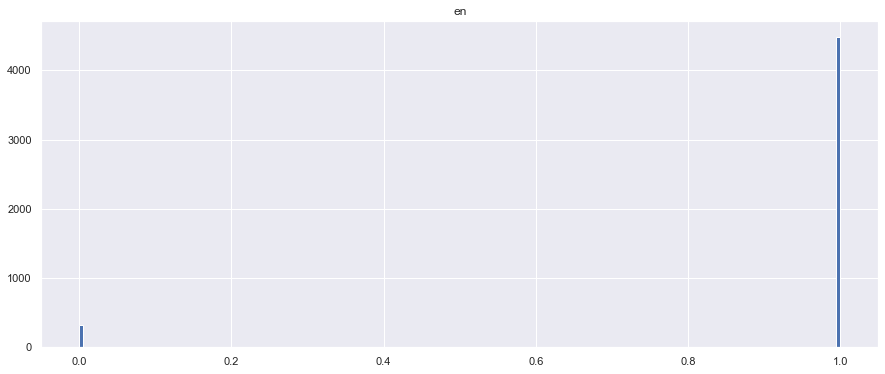

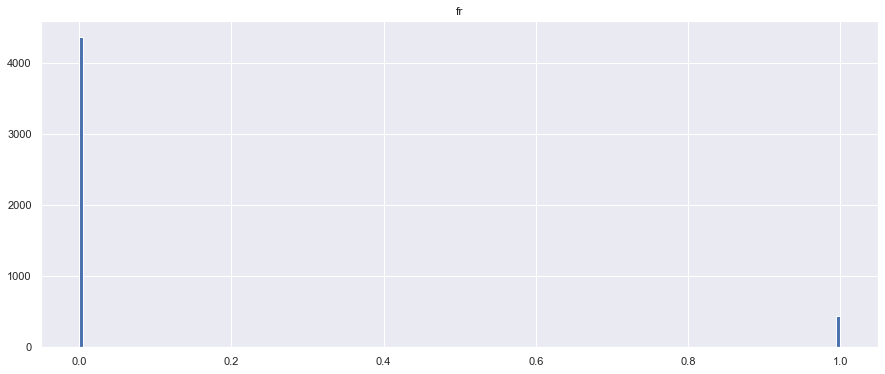

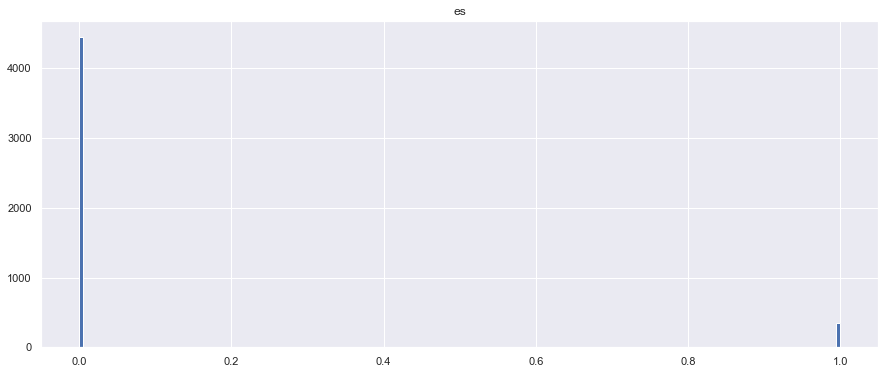

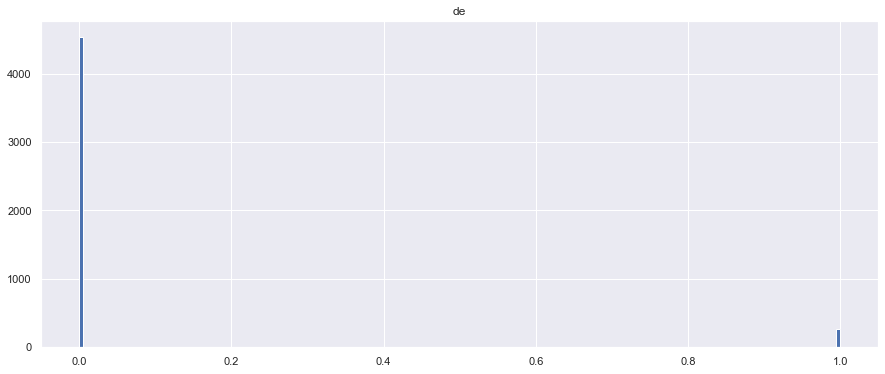

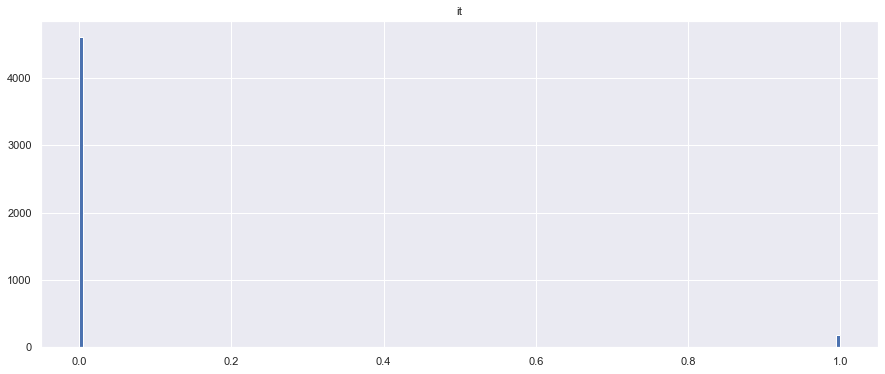

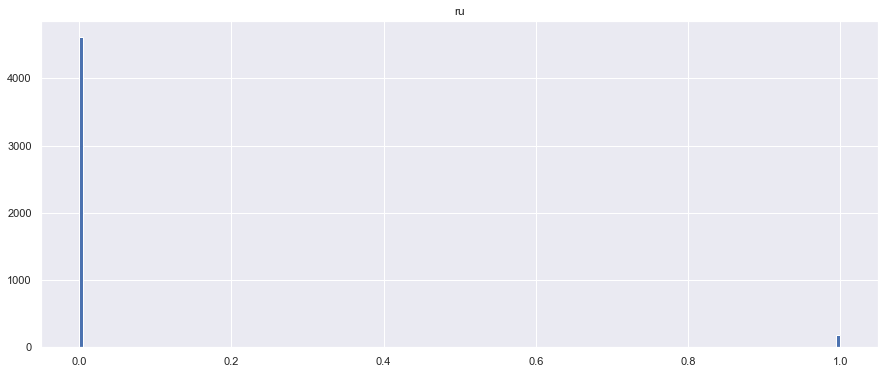

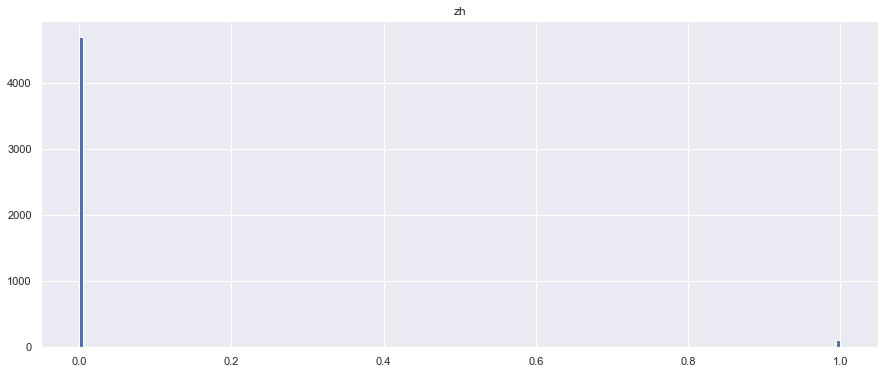

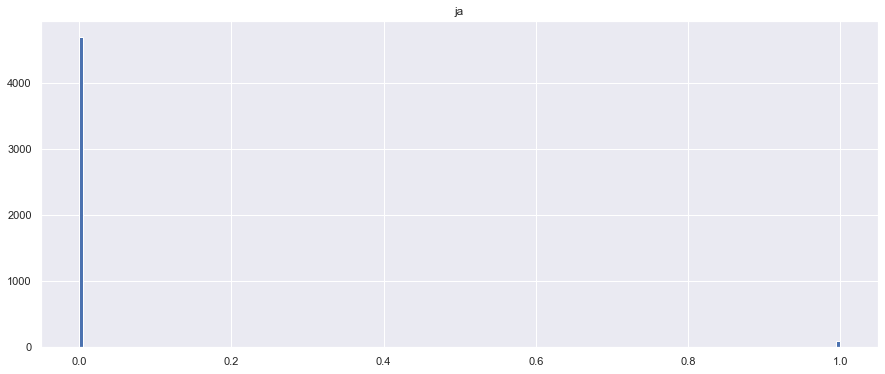

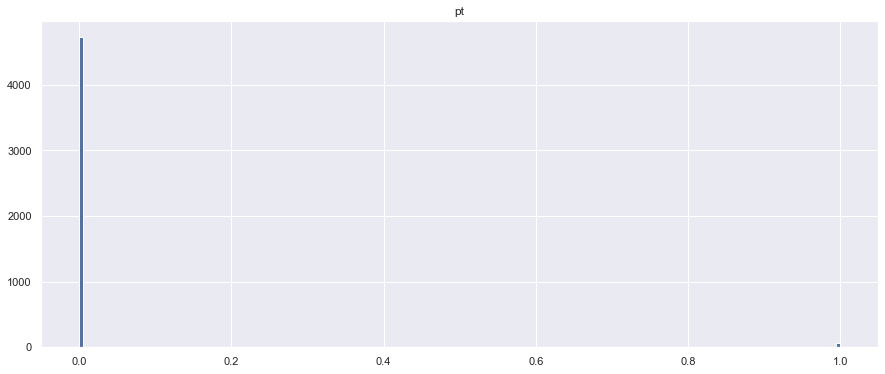

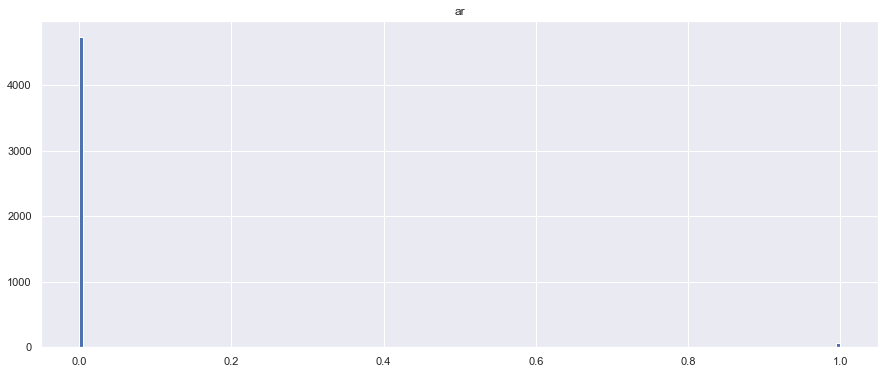

In [18]:
sb.set(rc={'figure.figsize':(15,6)})
for i in range(0,df_ohe.shape[1]):
    try:
        df_ohe.hist(column=df_ohe.columns[i], bins=200, edgecolor='white', label = df_ohe.columns[i])
        st = "../plots/Plots DF1/hist_ohe_col_"+str(i)+".png"
        plt.savefig(st)
        plt.show()
    except:
        pass

In [19]:
print("Count different Values in column:")
for (col,colval1) in df_ohe.iloc[:, :].iteritems(): 
    try:
        print("___________"+str(col)+"_______________")
        print(df_ohe[col].value_counts())
        print("\n\n\n")
    except:
        pass

Count different Values in column:
___________Unnamed: 0_______________
0       1
3208    1
3206    1
3205    1
3204    1
       ..
1600    1
1599    1
1598    1
1597    1
4802    1
Name: Unnamed: 0, Length: 4803, dtype: int64




___________budget_______________
0           1037
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13200000       1
14350531       1
3100000        1
12800000       1
9000           1
Name: budget, Length: 436, dtype: int64




___________id_______________
19995     1
333355    1
71157     1
43418     1
11588     1
         ..
13156     1
293863    1
16871     1
307081    1
25975     1
Name: id, Length: 4803, dtype: int64




___________original_title_______________
Out of the Blue       2
Batman                2
Undiscovered          1
Beneath Hill 60       1
The I Inside          1
                     ..
Secondhand Lions      1
The Age of Adaline    1
Drag Me to Hell       1
Southpaw              1
My Date with Drew     1

# Correlations and Heatmap of One-hot Encoded dataaset

In [41]:
print("All correaltion in df")
df_ohe.corr()          # calculate all correaltion in df

All correaltion in df


Unnamed: 0    budget        id  popularity   revenue   runtime  \
Unnamed: 0    1.000000 -0.761579  0.190771   -0.414342 -0.522110 -0.319236   
budget       -0.761579  1.000000 -0.089377    0.505414  0.730823  0.269610   
id            0.190771 -0.089377  1.000000    0.031202 -0.050425 -0.160271   
popularity   -0.414342  0.505414  0.031202    1.000000  0.644724  0.225732   
revenue      -0.522110  0.730823 -0.050425    0.644724  1.000000  0.250897   
...                ...       ...       ...         ...       ...       ...   
ru           -0.087745  0.059079 -0.046994    0.017812  0.037029  0.096333   
zh           -0.074470  0.073037 -0.003120    0.025224  0.044054  0.052058   
ja           -0.055883  0.051657 -0.044057    0.034373  0.032757  0.080314   
pt           -0.013131  0.018048 -0.007253   -0.015152  0.009901  0.002366   
ar           -0.050247  0.043038 -0.023042    0.021894  0.038733  0.100153   

            vote_average  vote_count  original_language  male_count  ...  \
Unnamed: 0     -0.120157   -0.442207           0.110218   -0.145579  ...   
budget          0.093146    0.593180          -0.081138    0.184433  ...   
id             -0.270595   -0.004128           0.066665    0.102385  ...   
popularity      0.273952    0.778130          -0.051983    0.257340  ...   
revenue         0.197150    0.781487          -0.059989    0.260018  ...   
...                  ...         ...                ...         ...  ...   
ru              0.023502    0.024710           0.005603    0.041842  ...   
zh              0.038664    0.041837           0.083346    0.030431  ...   
ja              0.046664    0.045332           0.082577    0.039658  ...   
pt             -0.003641   -0.007114           0.041891   -0.018216  ...   
ar              0.047892    0.027663           0.035834    0.039640  ...   

                  en        fr        es        de        it        ru  \
Unnamed: 0 -0.211906 -0.044129 -0.048914 -0.027963 -0.049827 -0.087745   
budget      0.146175  0.030831  0.037218  0.028981  0.035637  0.059079   
id         -0.124579 -0.067086 -0.051077 -0.048651 -0.053587 -0.046994   
popularity  0.107735  0.017821  0.016362  0.014916  0.023467  0.017812   
revenue     0.103458  0.032659  0.035743  0.019527  0.039758  0.037029   
...              ...       ...       ...       ...       ...       ...   
ru         -0.020674  0.117253  0.060193  0.123428  0.037705  1.000000   
zh         -0.095973  0.045447  0.038921  0.032074  0.035002  0.050425   
ja         -0.062965  0.057510  0.022243  0.063276  0.062607  0.040484   
pt         -0.038967  0.041750  0.020521 -0.005505  0.039424  0.003487   
ar         -0.018306  0.122865  0.055274  0.104320  0.040071  0.068442   

                  zh        ja        pt        ar  
Unnamed: 0 -0.074470 -0.055883 -0.013131 -0.050247  
budget      0.073037  0.051657  0.018048  0.043038  
id         -0.003120 -0.044057 -0.007253 -0.023042  
popularity  0.025224  0.034373 -0.015152  0.021894  
revenue     0.044054  0.032757  0.009901  0.038733  
...              ...       ...       ...       ...  
ru          0.050425  0.040484  0.003487  0.068442  
zh          1.000000  0.098673  0.005793  0.018132  
ja          0.098673  1.000000 -0.004677  0.071263  
pt          0.005793 -0.004677  1.000000 -0.014254  
ar          0.018132  0.071263 -0.014254  1.000000  

[63 rows x 63 columns]

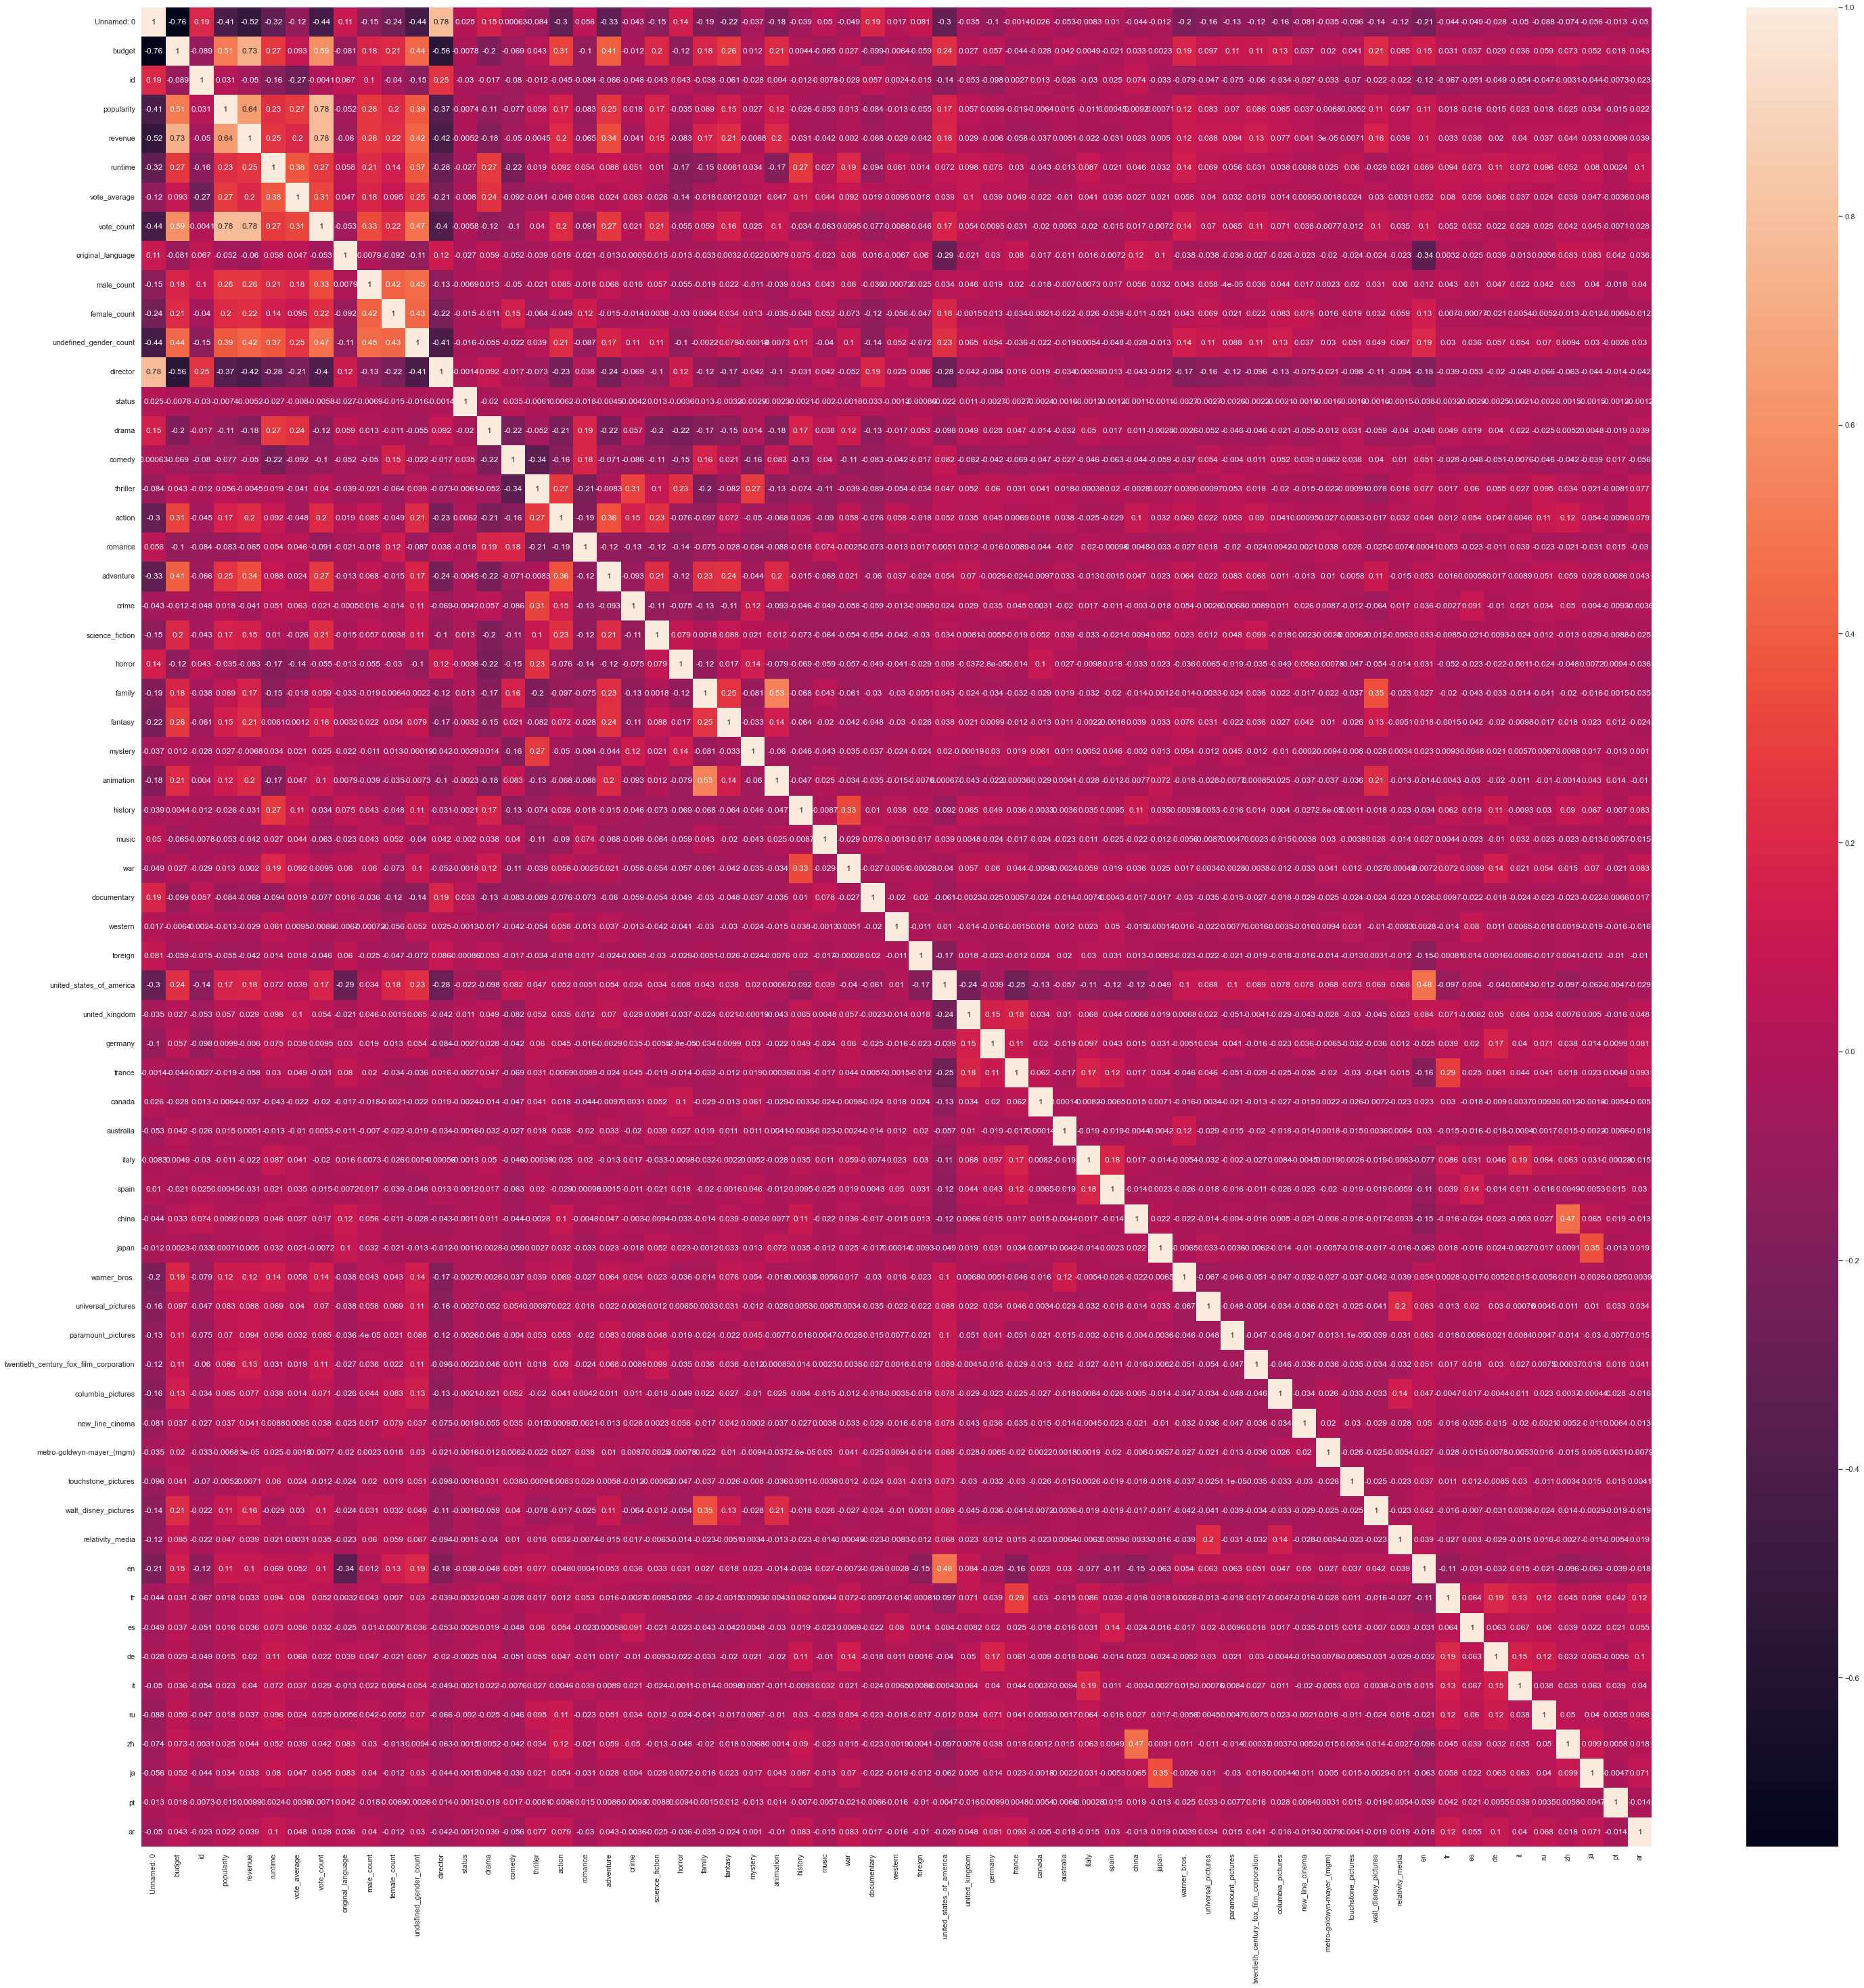

In [42]:
plt.figure(figsize=(50,50))
sb.heatmap(df_ohe.corr(),annot=True)   # heatmap to show the correaltion between columns 
st = "../plots/Plots DF1/heatmap_ohe.png"
plt.savefig(st)
plt.show()

# Plotting Scatter Plot for all highly Correlated Columns

In [51]:
corr_list = []
for (col1,colval1) in df_ohe.iloc[:, :].iteritems():  
    for (col2,colval2) in df_ohe.iloc[:, :].iteritems():
        if col1 == col2: 
            break 
        t1 = []
        try:
            t = df_ohe[col1]. corr(df_ohe[col2]) 
            if(t > 0.5 or t < -0.5):
                t1.append(col1)
                t1.append(col2)
                t1.append(t)
                corr_list.append(t1)
        except:
            pass

In [52]:
for i in range(0, len(corr_list)):
    print('Correlation between '+corr_list[i][0]+' and '+corr_list[i][1]+' is '+str(corr_list[i][2]))

Correlation between budget and Unnamed: 0 is -0.7615793215323824
Correlation between popularity and budget is 0.5054139990665325
Correlation between revenue and Unnamed: 0 is -0.5221097091653292
Correlation between revenue and budget is 0.7308228569244616
Correlation between revenue and popularity is 0.6447235045559979
Correlation between vote_count and budget is 0.5931803381308576
Correlation between vote_count and popularity is 0.7781298890348538
Correlation between vote_count and revenue is 0.781487326210197
Correlation between director and Unnamed: 0 is 0.7842841362457661
Correlation between director and budget is -0.5594031648064798
Correlation between animation and family is 0.5323205395172276


Correlation between budget and Unnamed: 0 is -0.7615793215323824


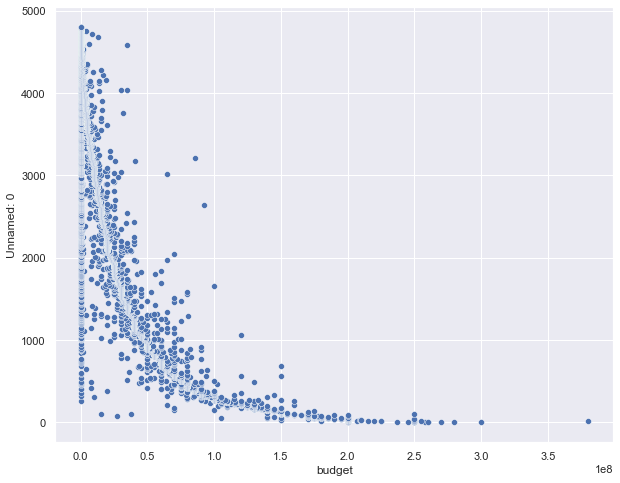

Correlation between popularity and budget is 0.5054139990665325


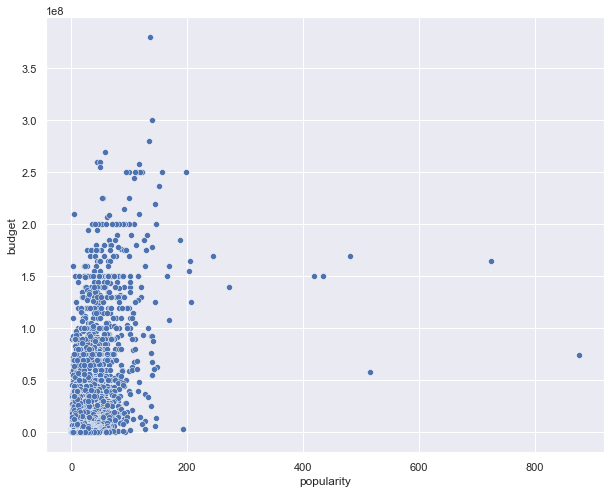

Correlation between revenue and Unnamed: 0 is -0.5221097091653292


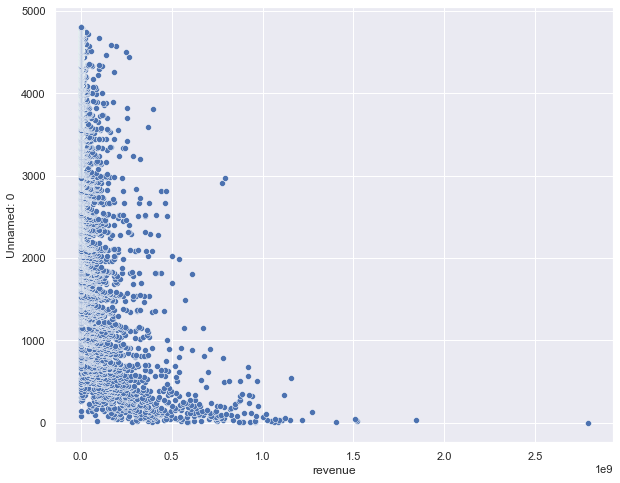

Correlation between revenue and budget is 0.7308228569244616


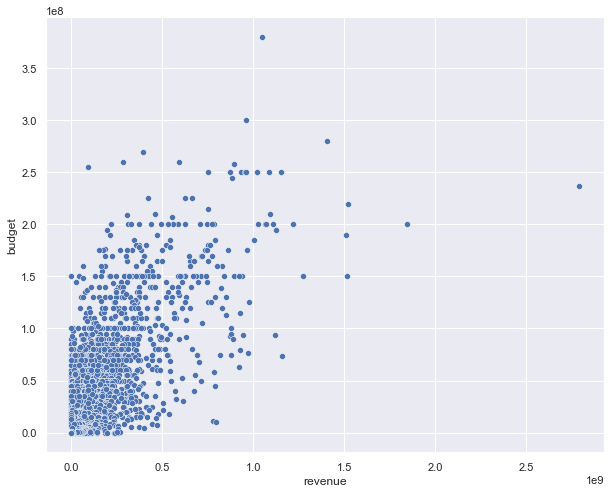

Correlation between revenue and popularity is 0.6447235045559979


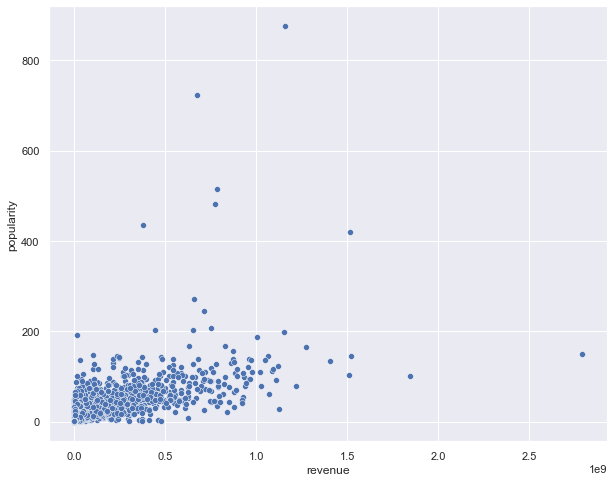

Correlation between vote_count and budget is 0.5931803381308576


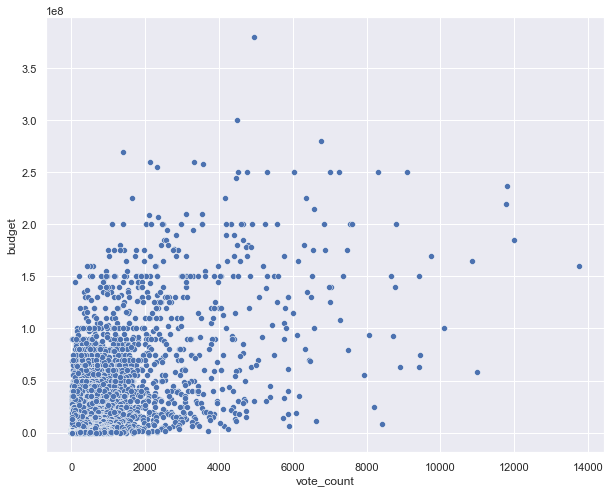

Correlation between vote_count and popularity is 0.7781298890348538


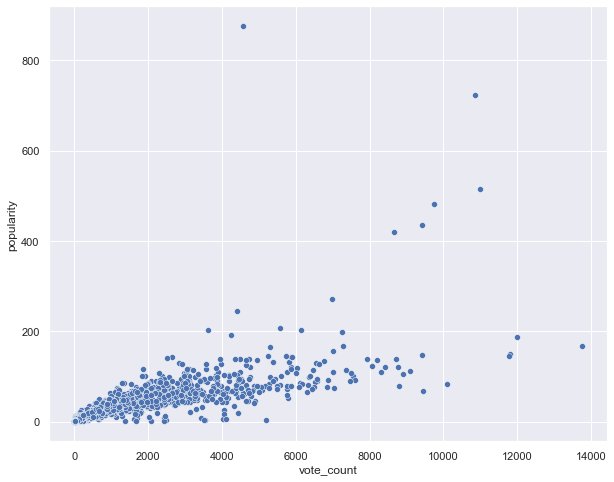

Correlation between vote_count and revenue is 0.781487326210197


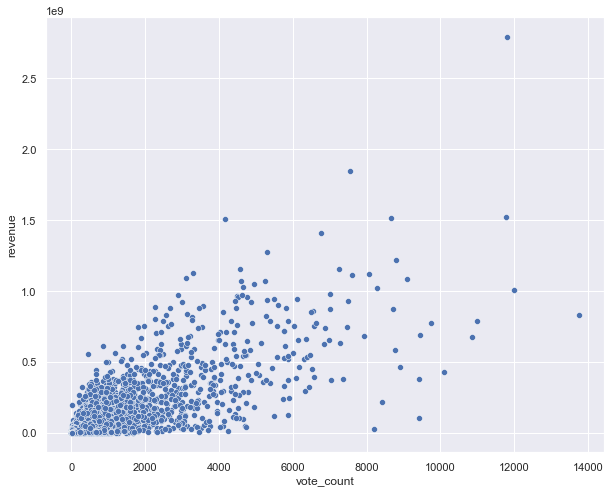

Correlation between director and Unnamed: 0 is 0.7842841362457661


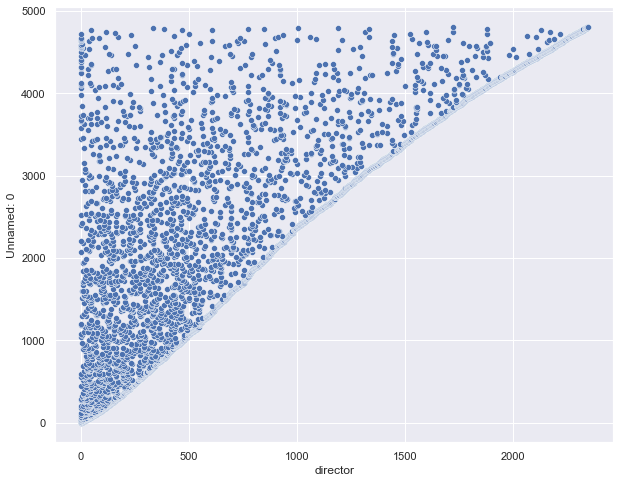

Correlation between director and budget is -0.5594031648064798


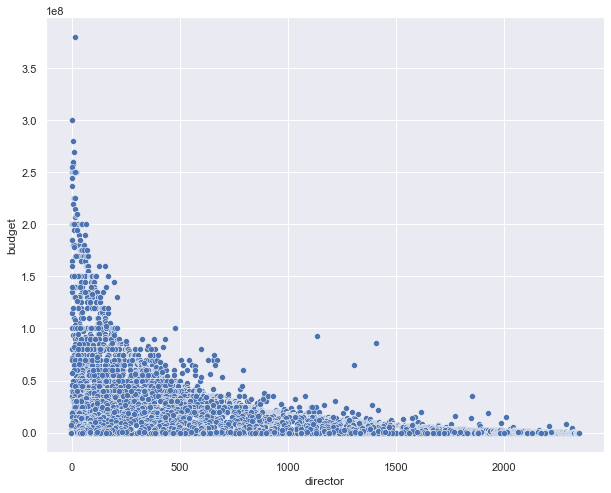

Correlation between animation and family is 0.5323205395172276


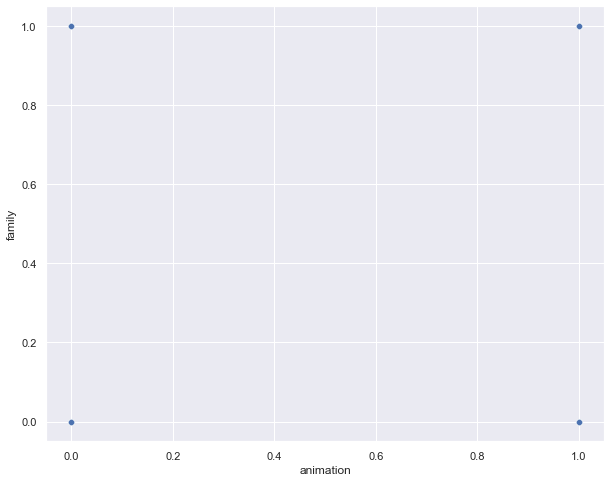

In [53]:
for i in range(0, len(corr_list)):
    plt.figure(figsize=(10,8))
    print('Correlation between '+corr_list[i][0]+' and '+corr_list[i][1]+' is '+str(corr_list[i][2]))
    sb.scatterplot(x = df_ohe[corr_list[i][0]] , y = df_ohe[corr_list[i][1]], data = df_ohe)
    st = "../plots/Plots DF1/scatterplot_ohe_"+str(corr_list[i][0])+"_"+str(corr_list[i][1])+".png"
    plt.savefig(st)
    plt.show()

# Box Plot

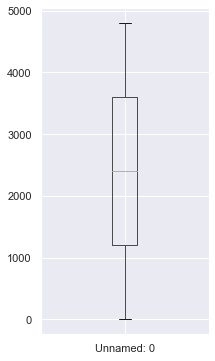

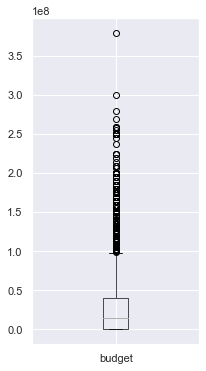

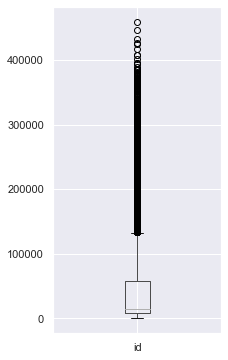

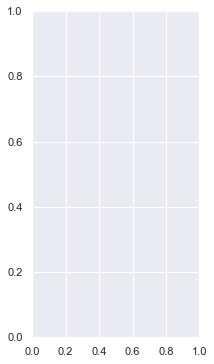

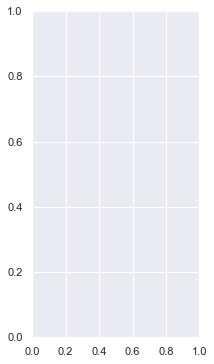

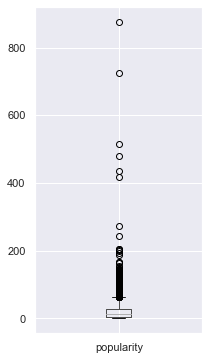

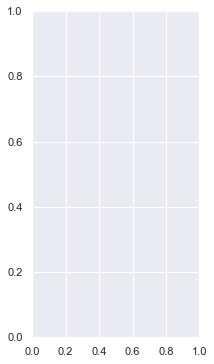

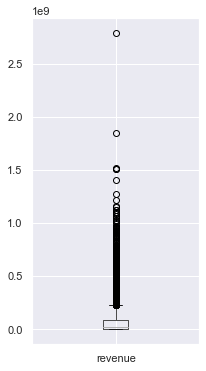

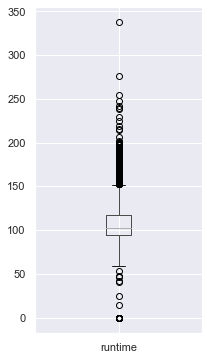

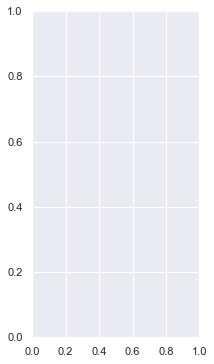

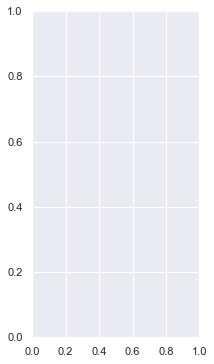

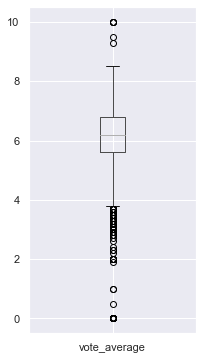

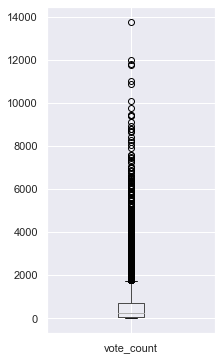

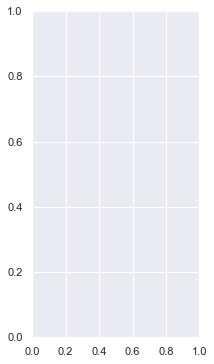

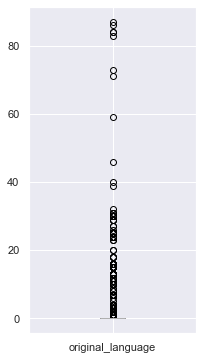

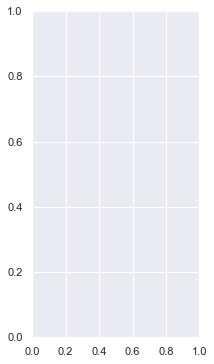

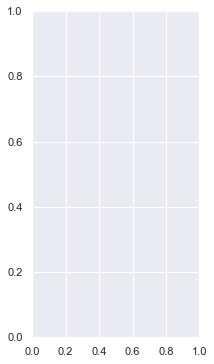

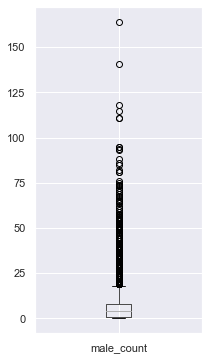

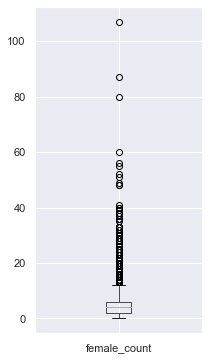

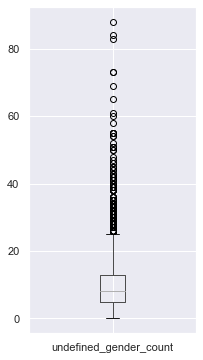

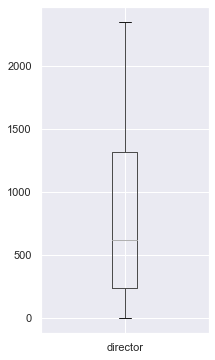

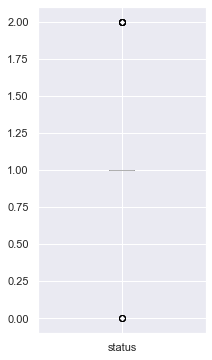

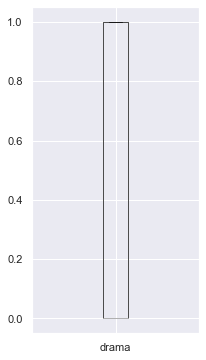

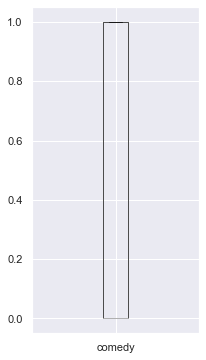

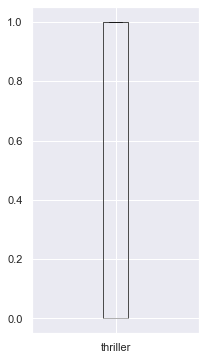

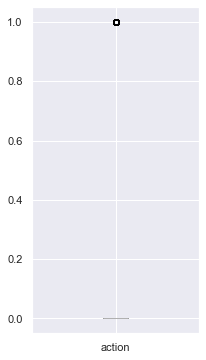

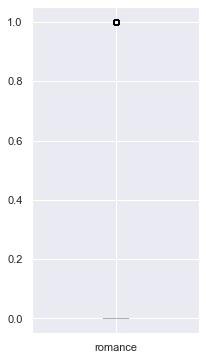

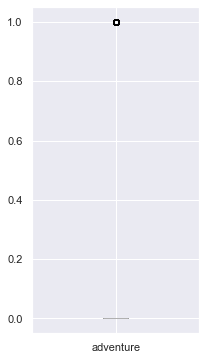

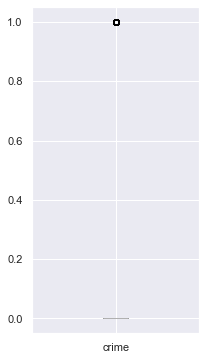

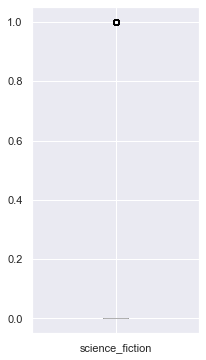

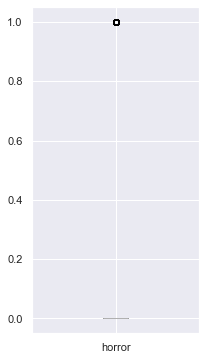

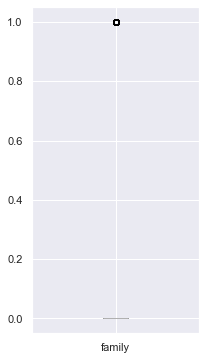

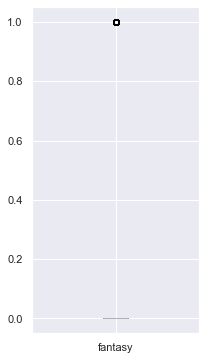

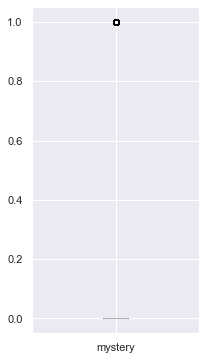

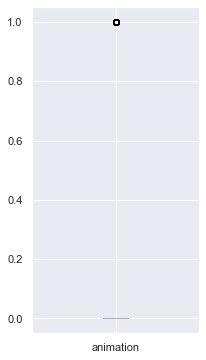

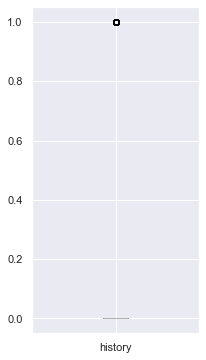

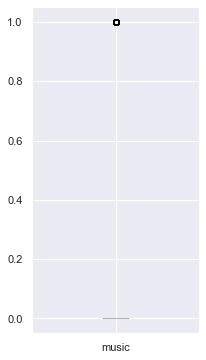

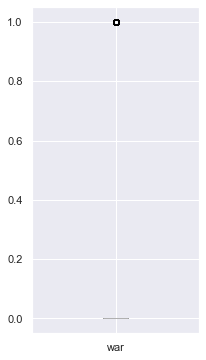

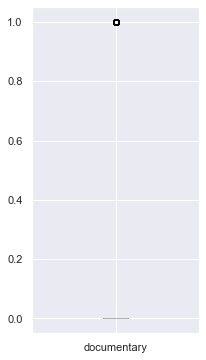

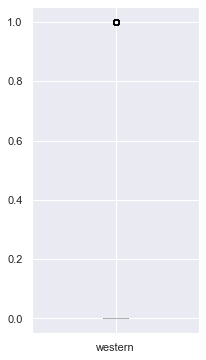

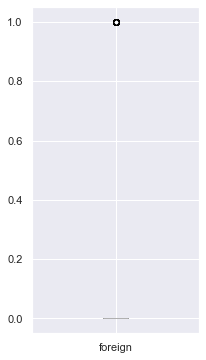

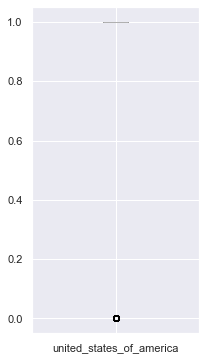

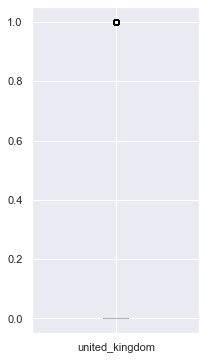

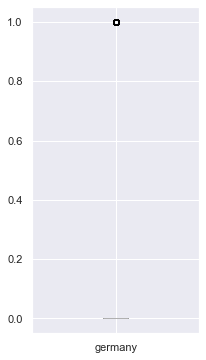

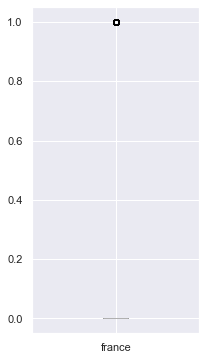

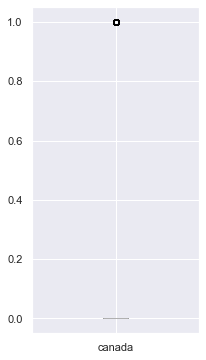

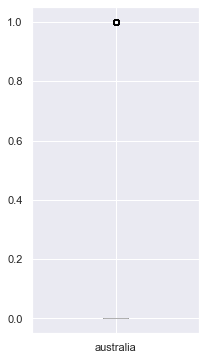

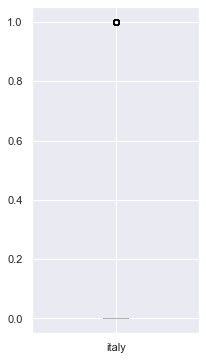

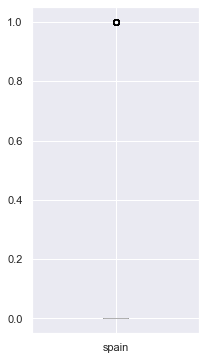

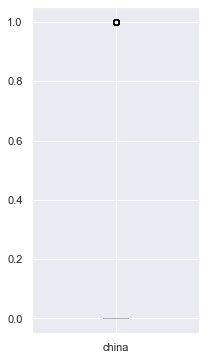

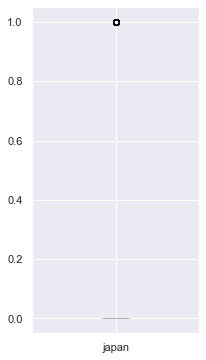

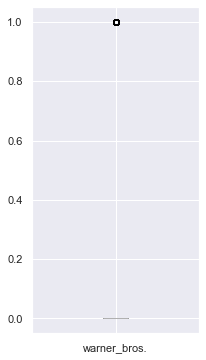

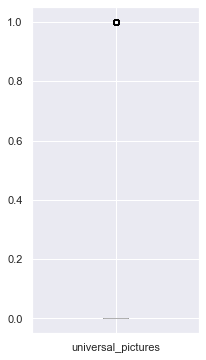

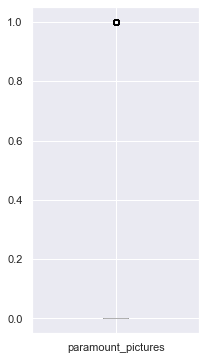

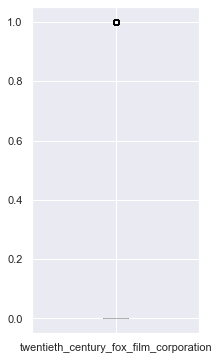

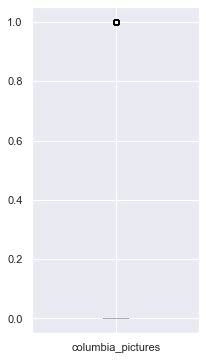

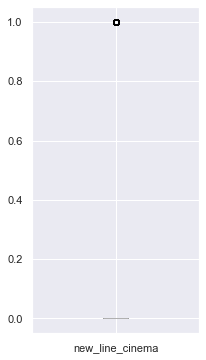

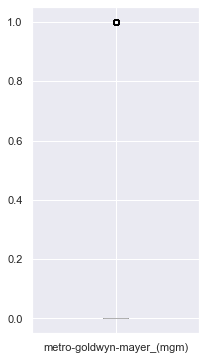

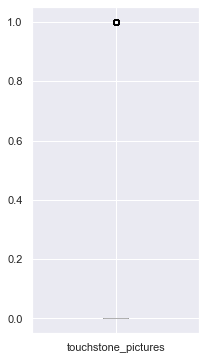

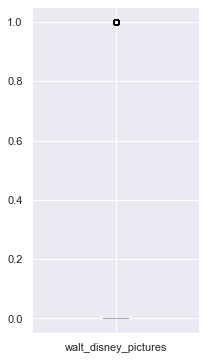

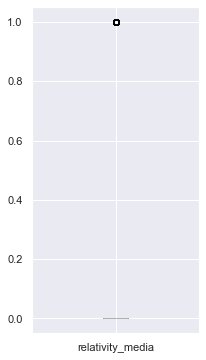

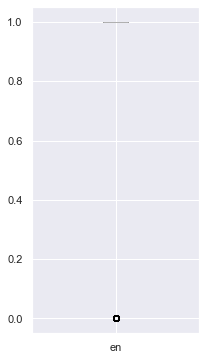

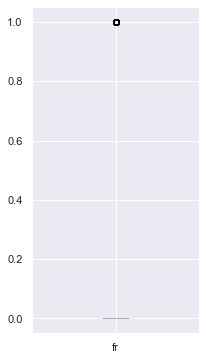

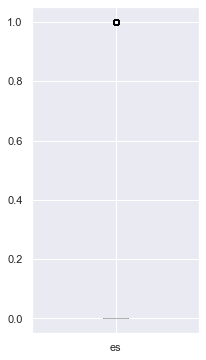

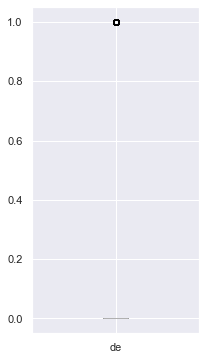

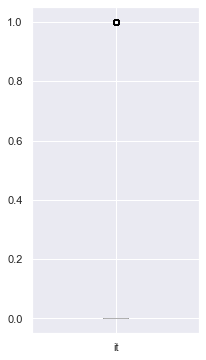

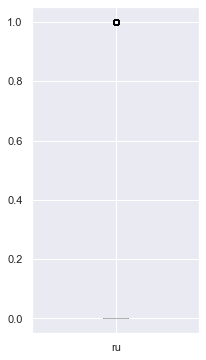

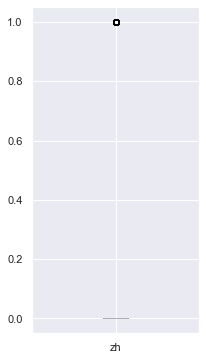

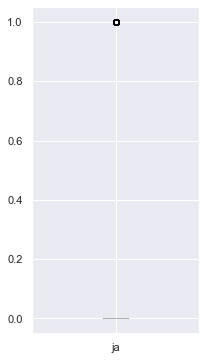

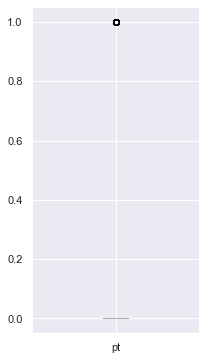

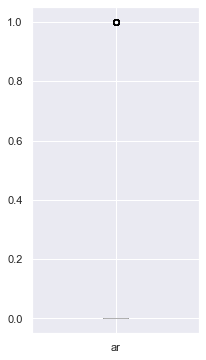

C:\Users\Sharm\AppData\Local\Temp\ipykernel_19080\4167746338.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(3,6))


<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

<Figure size 216x432 with 0 Axes>

In [50]:
for i in range(0, df.shape[0]): 
    try:
        plt.figure(figsize=(3,6))
        df_ohe.boxplot(column =[df_ohe.columns[i]], grid = True)
        st = "../plots/Plots DF1/boxplot_ohe_col_"+str(i)+".png"
        plt.savefig(st)
        plt.show()
    except: 
        pass

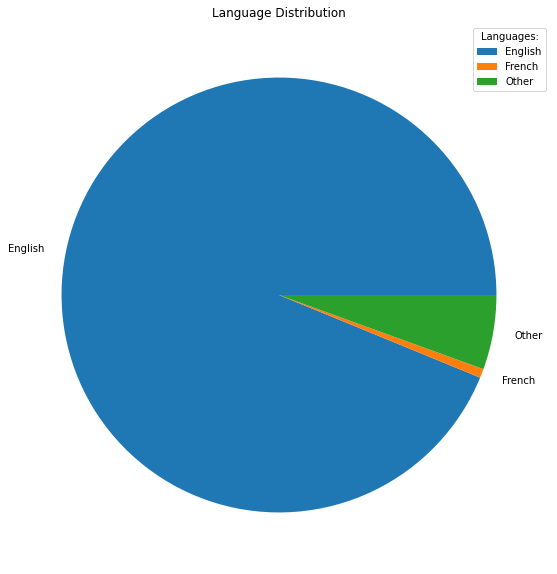

In [41]:
lang = dict(df_ohe.original_language.value_counts())
counts = []
labels = []
languages_rev = dict(zip(languages.values(), languages.keys()))
# counts.append(lang[0])
t = 0
for i in lang.keys():
    if(i == 0):
        counts.append(lang[i])
    elif(i == 1):
        counts.append(lang[i])
    else:
        t += lang[i]
counts.append(t)
labels.append("English")
labels.append("French") 
labels.append("Other") 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("Language Distribution")
plt.pie(counts, labels = labels)
plt.legend(title = "Languages:")
plt.savefig("../plots/Plots DF1/ohe_piechart_language.jpg")
plt.show()
